# ***Introduction to DS Project - Group 01***


Part A
---

Ron Elias

Yahlly Schein


# Imports

In [1]:
# !pip install xgboost
# !pip install miceforest
# !pip install catboost
# !pip install shap
# !pip install optuna

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import optuna
import shap
import ast
import math
from scipy.stats import uniform, randint, loguniform
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression #linear model
from sklearn.neighbors import KNeighborsClassifier #classifiers
from sklearn.neighbors import KNeighborsRegressor #regressors
from sklearn.preprocessing import StandardScaler #normalization
from sklearn.preprocessing import MinMaxScaler #normalization
from sklearn.ensemble import IsolationForest #outlier removal
from sklearn.model_selection import train_test_split #hold-out method
from sklearn.model_selection import KFold #K-Fold method
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix #confusion matrix
from sklearn.metrics import roc_curve #ROC
from sklearn.metrics import auc #AUC
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from statsmodels.graphics.mosaicplot import mosaic
from sklearn import svm
from scipy import stats
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.svm import SVR
from sklearn.compose import ColumnTransformer
import miceforest as mf
import warnings
warnings.filterwarnings("ignore")

# Data Understanding and Exploration

## Load the data

In [3]:
train_df = pd.read_csv("Housing_Prices_dataset_train.csv")
test_df = pd.read_csv("Housing_Prices_dataset_test.csv")

In [4]:
train_df.head()

MSSubClass MSZoning  LotFrontage       LotArea Street Alley LotShape  \
0          60       RL   114.599056  12976.322829   Pave   NaN      Reg   
1          80       RL    66.959348  15594.194525   Pave   NaN      IR2   
2          20       RL          NaN  12391.795255   Pave   NaN      IR3   
3          50       RM    24.568303   1936.000000   Pave  Pave      Reg   
4          20       RL          NaN  25084.792141   Pave   NaN      IR3   

  LandContour Utilities LotConfig  ...   PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub    Inside  ...   0.000000    NaN    NaN         NaN   
1         Bnk    AllPub    Inside  ...   0.000000    NaN    NaN         NaN   
2         Lvl    AllPub       FR3  ...   0.000000    NaN  MnPrv         NaN   
3         Lvl    AllPub    Inside  ...  34.640056    NaN  MnPrv         NaN   
4         Lvl    AllPub    Inside  ...   0.000000    NaN  GdPrv         NaN   

      MiscVal MoSold  YrSold  SaleType  SaleCondition      SalePrice  
0  296.249343      5    2008     ConLD         Normal  155664.570167  
1  254.008897      7    2008     ConLD         Normal  192977.232227  
2  188.143817      2    2010        WD         Normal  142885.167896  
3    0.000000     12    2007        WD         Normal   84625.216884  
4    0.000000      5    2010       COD        Abnorml  131905.509480  

[5 rows x 80 columns]

In [5]:
train_df.shape

(1168, 80)

In [6]:
pd.set_option('display.max_columns', None)

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1168 non-null   int64  
 1   MSZoning       1168 non-null   object 
 2   LotFrontage    963 non-null    float64
 3   LotArea        1168 non-null   float64
 4   Street         1168 non-null   object 
 5   Alley          211 non-null    object 
 6   LotShape       1168 non-null   object 
 7   LandContour    1168 non-null   object 
 8   Utilities      1168 non-null   object 
 9   LotConfig      1168 non-null   object 
 10  LandSlope      1168 non-null   object 
 11  Neighborhood   1168 non-null   object 
 12  Condition1     1168 non-null   object 
 13  Condition2     1168 non-null   object 
 14  BldgType       1168 non-null   object 
 15  HouseStyle     1168 non-null   object 
 16  OverallQual    1168 non-null   int64  
 17  OverallCond    1168 non-null   int64  
 18  YearBuil

## Plot the label distribution

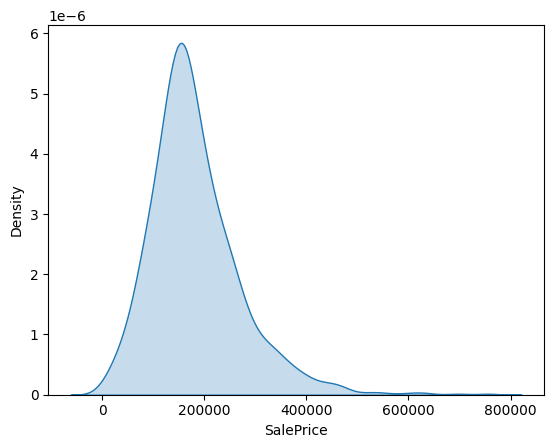

In [8]:
sns.kdeplot(data=train_df["SalePrice"], fill=True)
plt.xlabel('SalePrice')
plt.ylabel('Density')
plt.show()

## Label statistics

In [9]:
train_df["SalePrice"].describe()

count      1168.000000
mean     181982.786079
std       89206.602744
min        3573.797098
25%      127019.572086
50%      166082.959443
75%      224867.542569
max      756590.767461
Name: SalePrice, dtype: float64

## Exploaration

In [10]:
def check_nulls(df):
  print("These columns contain NAN values:")
  print("-----------")
  total_cols = 0
  list_of_cols = []
  for col in df.columns:
    num_of_nulls = len(df) - df[col].count()
    if num_of_nulls > 0:
      list_of_cols.append(col)
      total_cols += 1
      print(f"The num of nulls in column {col} is: {num_of_nulls}")

  print("-----------")
  print(f"The total number of columns that contain NAN values is {total_cols}")
  return(list_of_cols)

check_nulls(train_df)

These columns contain NAN values:
-----------
The num of nulls in column LotFrontage is: 205
The num of nulls in column Alley is: 957
The num of nulls in column MasVnrType is: 649
The num of nulls in column MasVnrArea is: 6
The num of nulls in column BsmtQual is: 67
The num of nulls in column BsmtCond is: 74
The num of nulls in column BsmtExposure is: 67
The num of nulls in column BsmtFinType1 is: 56
The num of nulls in column BsmtFinType2 is: 51
The num of nulls in column Electrical is: 44
The num of nulls in column FireplaceQu is: 469
The num of nulls in column GarageType is: 80
The num of nulls in column GarageYrBlt is: 66
The num of nulls in column GarageFinish is: 104
The num of nulls in column GarageQual is: 98
The num of nulls in column GarageCond is: 92
The num of nulls in column PoolQC is: 962
The num of nulls in column Fence is: 786
The num of nulls in column MiscFeature is: 957
-----------
The total number of columns that contain NAN values is 19


['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [11]:
train_df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

## Plot histograms of all features

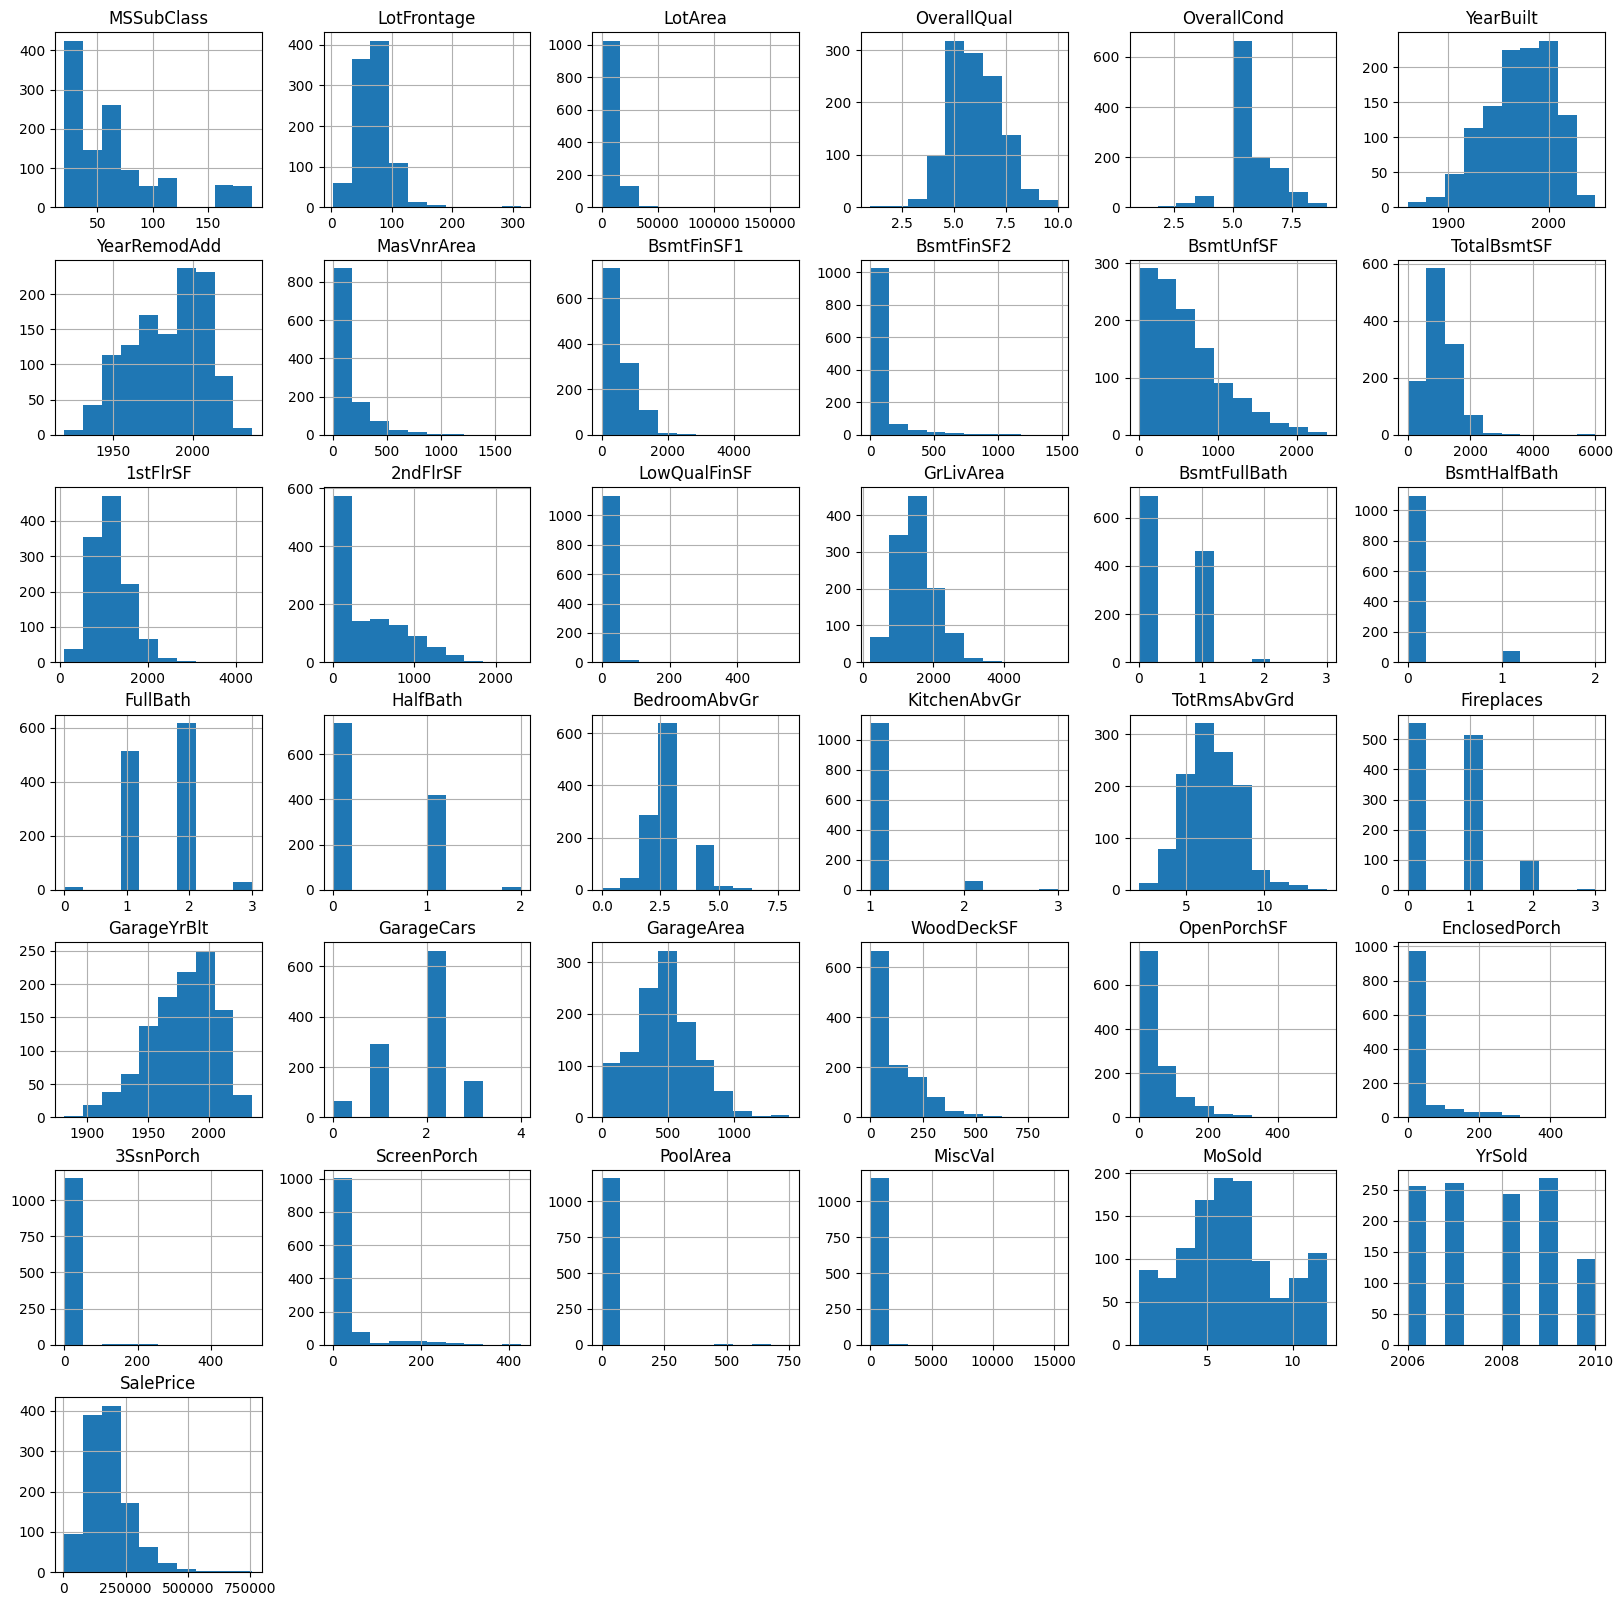

In [12]:
train_df.hist(figsize=(20, 20), xlabelsize=10, ylabelsize=10)
plt.show()

When reviewing the histograms for each column in the dataset, there are several insights we can gather:

*   Categorical Variables: Categorical variables like 'Neighborhood' and 'MSZoning' might show an imbalance in categories, which could affect model training and accuracy.
*   Zero-Inflated Variables: Variables such as 'PoolArea' or 'MiscVal' may have many zero values, suggesting limited variation in these features.
*   Outliers: Outliers in continuous variables can skew the distribution and may need to be addressed during preprocessing.
*   Binary Variables: Binary variables like 'CentralAir' may indicate a majority of one category over the other, impacting model interpretation.
*   Temporal Trends: Variables like 'YearBuilt' and 'YearRemodAdd' can reveal trends in housing development and renovation patterns.




## Scatter plot for all the numeric columns

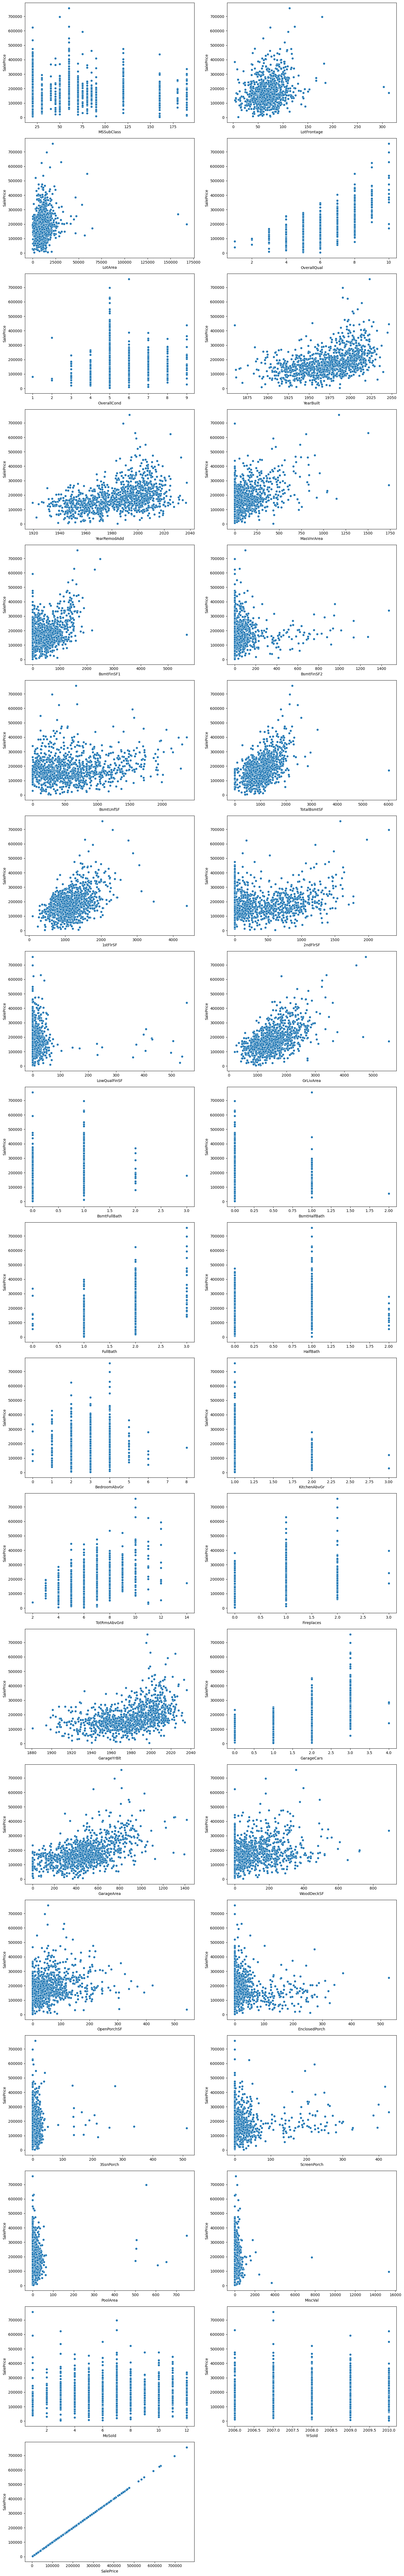

In [13]:
numerical_columns = train_df.select_dtypes(exclude=['object']).columns.tolist()

# Determine the number of rows and columns for subplots
num_plots = len(numerical_columns)
cols = 2
rows = (num_plots + cols - 1) // cols

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 5))

# Flatten the axes if there is more than one row
axes = axes.flatten()

# Loop through numerical columns and create scatter plots
for i, column in enumerate(numerical_columns):
    sns.scatterplot(x=train_df[column], y=train_df["SalePrice"], ax=axes[i])
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("SalePrice")

# Hide any empty subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

## Plot the correlation to the label of all the numeric columns

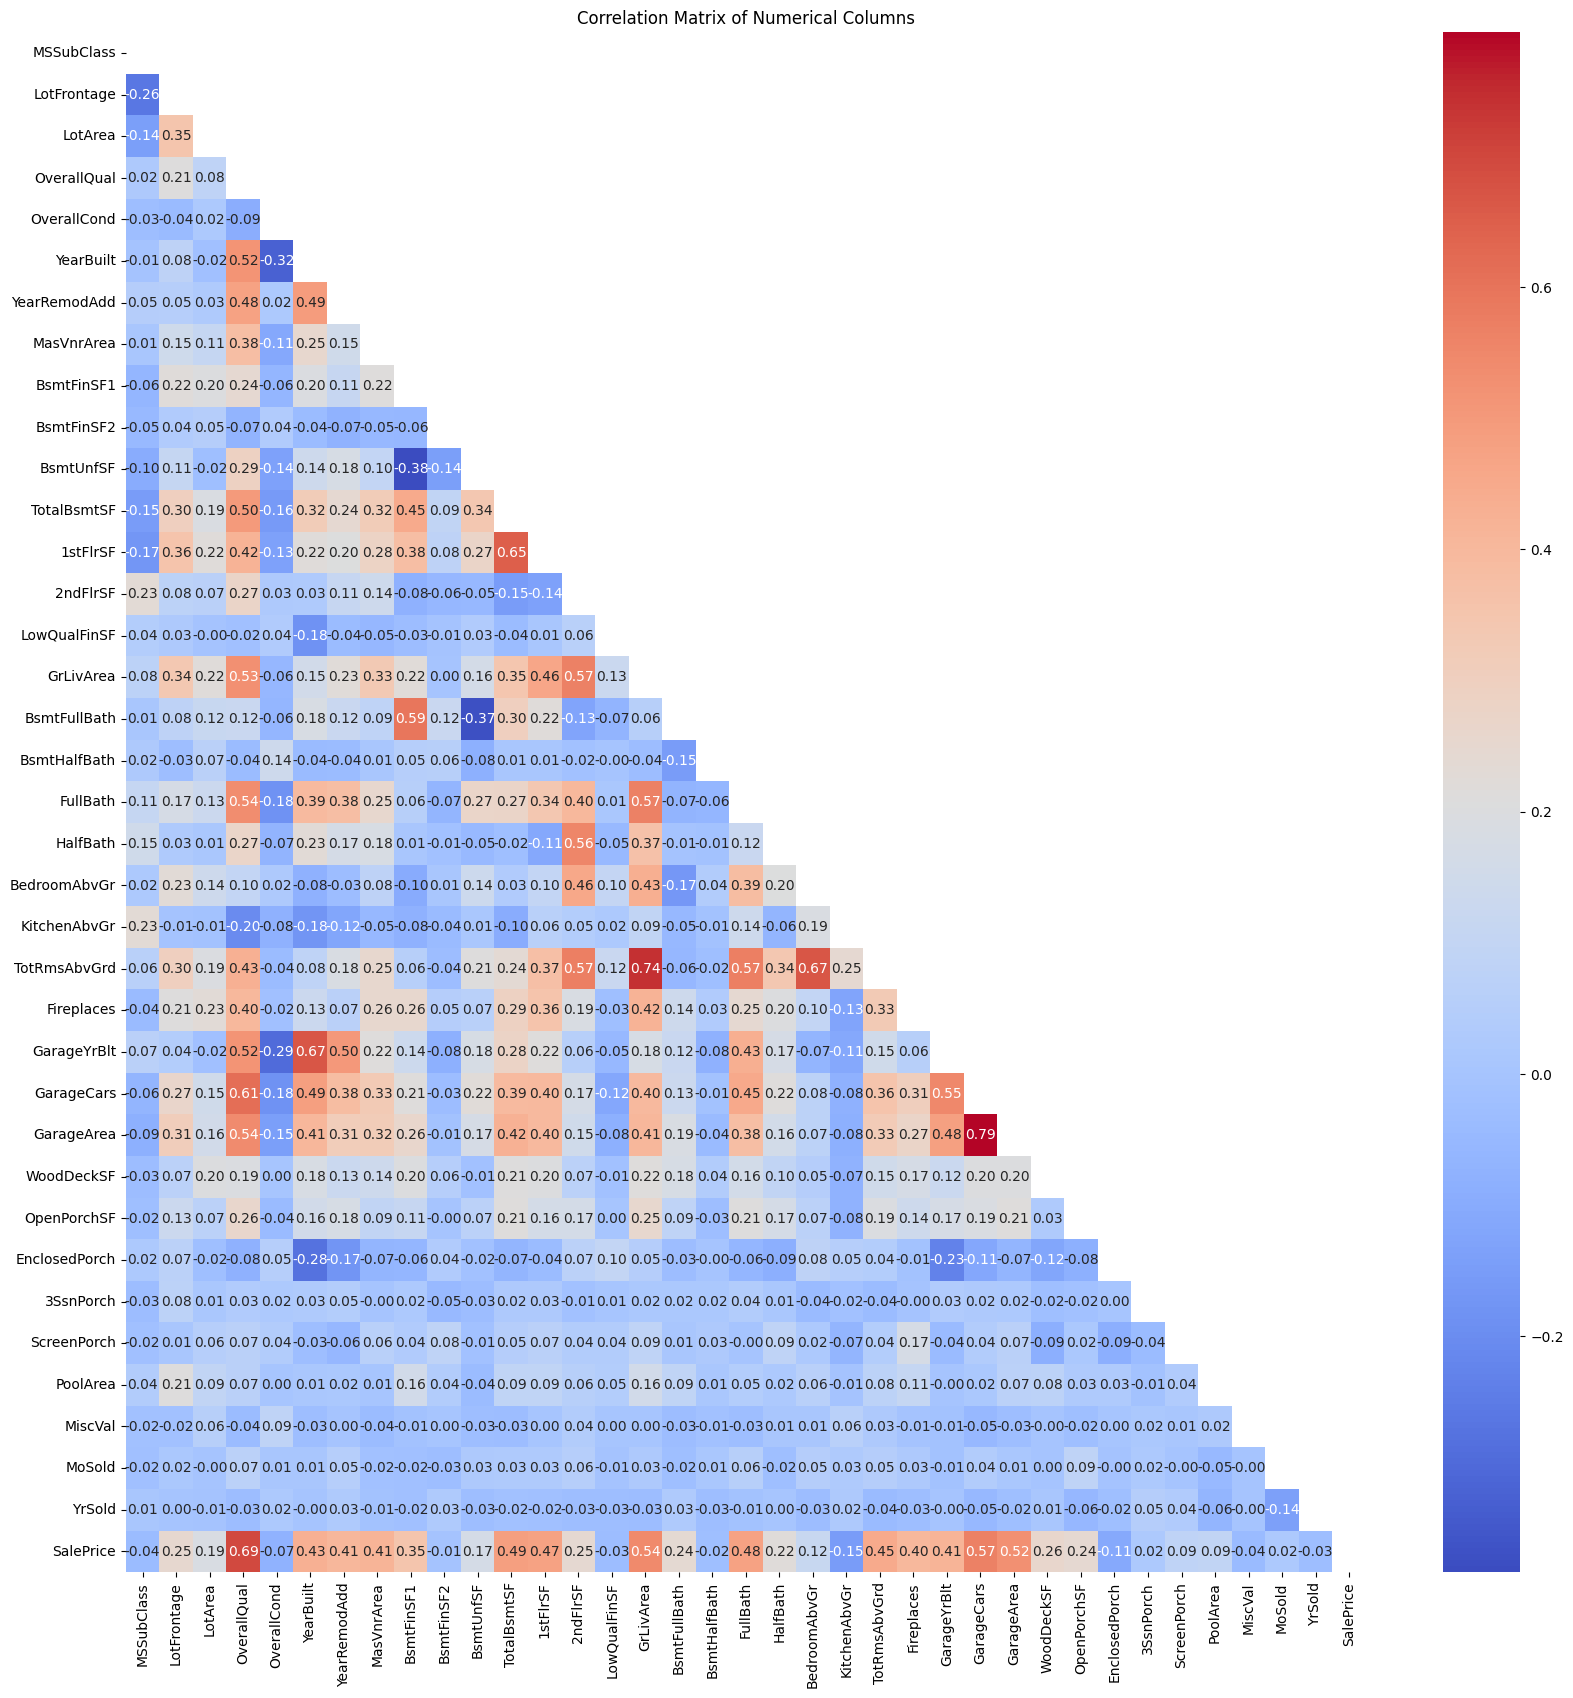

In [14]:
plt.figure(figsize=(20, 20))

# Create a correlation matrix for numerical columns
correlation_matrix = train_df[numerical_columns].corr()

# Mask the upper triangle for better readability
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# plot the heat map
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", mask=mask)

plt.title("Correlation Matrix of Numerical Columns")
plt.show()

We can see that:
1. Only about half of the numerical fetaures are linearly correlated to "SalePrice"
2. There is a a very high correlation between: 1stFlrSF and 2ndflrSF GarageCars and GarageArea TotRmsAbvGrd and GrLivArea,GarageYrBlt and YearBuilt.  Probably because they explain the same variance
3. The feautue with the strongest correlation to the label is OverallQual.

### Feature called 'OverallQual' Could explain the price pretty well (very correlated to the label)

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

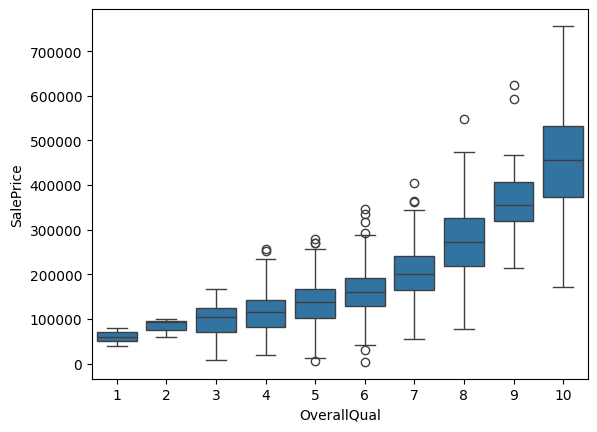

In [15]:
sns.boxplot(x=train_df["OverallQual"], y=train_df['SalePrice'])

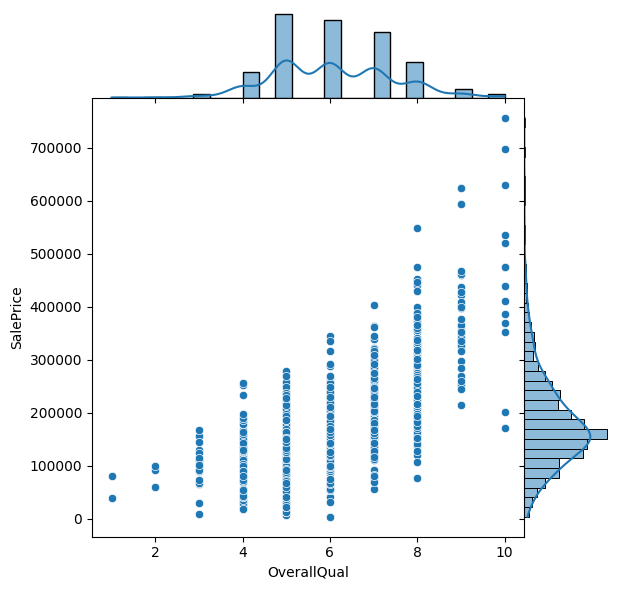

In [16]:
g = sns.JointGrid(data=train_df, x="OverallQual", y="SalePrice", space=0)
g = g.plot_joint(sns.scatterplot)
g = g.plot_marginals(sns.histplot, kde=True)

plt.show()

## Each categorial column plotted against the label

In [17]:
object_columns = train_df.select_dtypes(exclude=['int64','float64']).columns.tolist()
train_df[object_columns+["SalePrice"]]

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0          RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1          RL   Pave   NaN      IR2         Bnk    AllPub    Inside       Sev   
2          RL   Pave   NaN      IR3         Lvl    AllPub       FR3       Gtl   
3          RM   Pave  Pave      Reg         Lvl    AllPub    Inside       Gtl   
4          RL   Pave   NaN      IR3         Lvl    AllPub    Inside       Gtl   
...       ...    ...   ...      ...         ...       ...       ...       ...   
1163       RH   Pave  Grvl      Reg         Lvl    AllPub    Corner       Mod   
1164       RL   Pave   NaN      Reg         HLS    AllPub       FR2       Sev   
1165       RL   Pave   NaN      Reg         HLS    AllPub    Inside       Gtl   
1166       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1167       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Mod   

     Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle  \
0         CollgCr       Norm       Norm     1Fam       SLvl     Gable   
1           NAmes       Norm       Norm     1Fam     2.5Fin     Gable   
2          Sawyer       RRNn       Norm     1Fam     1Story     Gable   
3         MeadowV       Norm       Norm    Twnhs     2.5Unf     Gable   
4           NAmes       Norm       Norm     1Fam     1Story       Hip   
...           ...        ...        ...      ...        ...       ...   
1163      Somerst       Norm       Norm   TwnhsE     1Story     Gable   
1164      Gilbert       Norm      Feedr     1Fam     2.5Fin      Flat   
1165        NAmes       Norm       Norm     1Fam     1Story       Hip   
1166      CollgCr       Norm       Norm     1Fam     2.5Unf      Flat   
1167        NAmes       Norm       Norm     1Fam     1Story     Gable   

     RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual ExterCond  \
0     CompShg     VinylSd     VinylSd    BrkFace        Gd        TA   
1     CompShg     Wd Sdng     Wd Sdng        NaN        TA        TA   
2     WdShake     MetalSd     MetalSd    BrkFace        TA        Gd   
3     CompShg     CemntBd     CmentBd      Stone        TA        TA   
4     CompShg     VinylSd     Plywood    BrkFace        TA        Po   
...       ...         ...         ...        ...       ...       ...   
1163  WdShake     VinylSd     VinylSd        NaN        TA        TA   
1164  CompShg     VinylSd       Other        NaN        Gd        TA   
1165  ClyTile     MetalSd     MetalSd    BrkFace        TA        TA   
1166  CompShg     VinylSd     VinylSd        NaN        Gd        TA   
1167  CompShg     Plywood     MetalSd    BrkFace        TA        Gd   

     Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2  \
0         PConc       Gd       TA           No          GLQ          Unf   
1         PConc       TA       TA           No          LwQ          Unf   
2        CBlock       Ex       Po          NaN          BLQ          NaN   
3        CBlock       Fa       TA           Av          BLQ          GLQ   
4        CBlock       TA      NaN           No          Rec          Rec   
...         ...      ...      ...          ...          ...          ...   
1163      PConc       TA       Gd           No          Unf          GLQ   
1164      PConc       Ex       Gd          NaN          Unf          Unf   
1165     CBlock       TA       Gd           No          Unf          Rec   
1166      PConc       Gd       TA           No          Unf          Unf   
1167       Slab       Gd       TA           Gd          ALQ          Unf   

     Heating HeatingQC CentralAir Electrical KitchenQual Functional  \
0      Floor        Ex          Y      SBrkr          Ex       Maj1   
1       GasA        Ex          Y      SBrkr          Gd       Min1   
2       Wall        TA          Y      SBrkr          TA        Sev   
3       Grav        Gd          Y        Mix          TA        Typ   
4       GasA        Fa

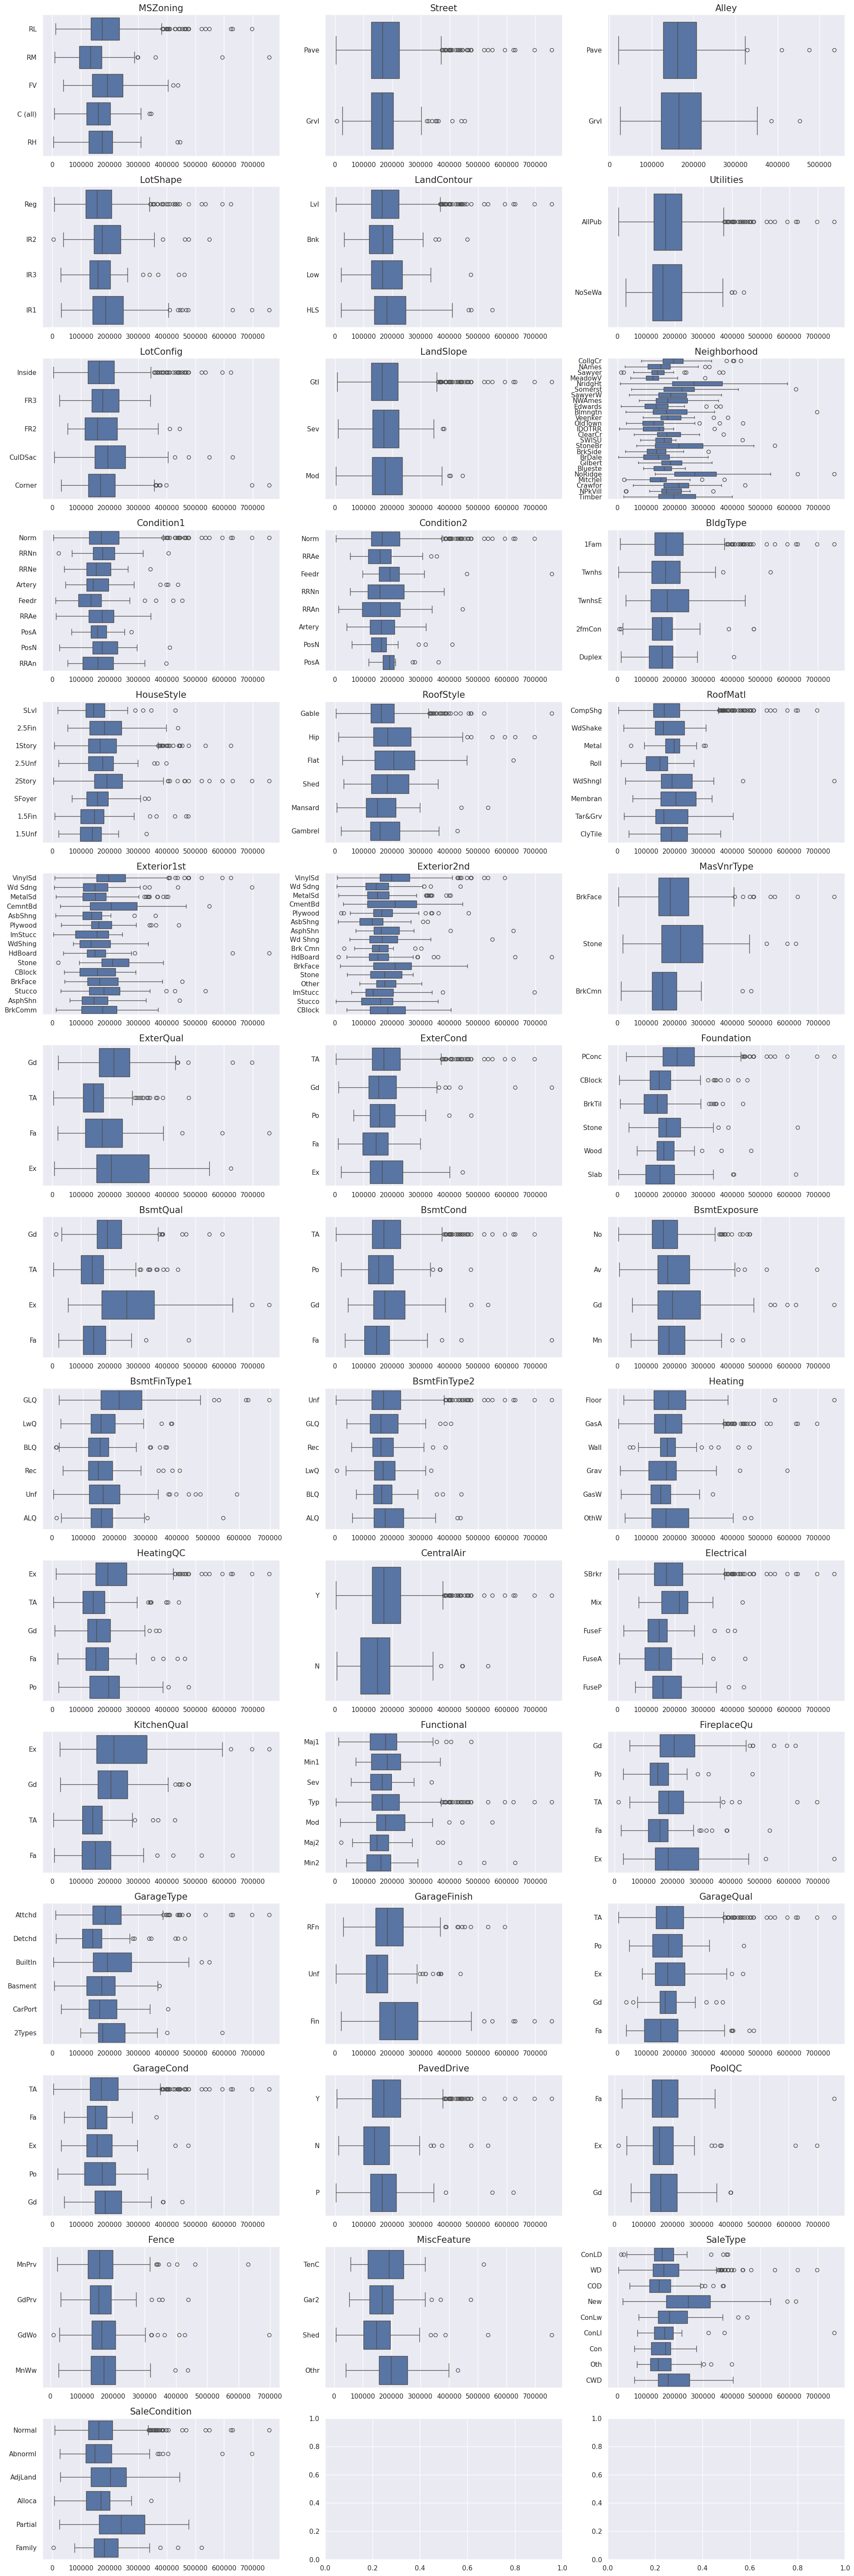

In [18]:
# This function shows each categorial column plotted against the label
def label_dist(train_df, label_feature_name, figsize=(20,20), title_size=15, to_save=False,add_txt=False, order_x_lst=None):
    sns.set(font_scale = 1)
    feature_list=list(train_df.columns)
    fig, axs = plt.subplots(math.ceil(len(feature_list)/3), ncols = 3, figsize = figsize)
    for i, feature in enumerate(feature_list):
        if feature == label_feature_name:
            continue
        k = i%3
        j = i//3
        sns.boxplot(x=label_feature_name, y=feature, data=train_df,showfliers=True, width=0.8, ax=axs[j, k], order=order_x_lst)

        axs[j,k].set_title(f'{feature}', size=title_size)
#         axs[j,k].set(xticklabels=[])
        axs[j,k].set(ylabel=None)
        axs[j,k].set(xlabel=None)
    plt.tight_layout()
    if to_save:
        plt.savefig(to_save)
    plt.show()


label_dist(train_df[object_columns+["SalePrice"]],"SalePrice", figsize=(20,60))

## Columns removal

As of this point, we dicide not to remove any columns and deal with the big dimention using feature selection.

We cannot see any columns that we find them as useless

# Feature conversions and cleaness

## Convert all ordinal columns to numeric values

### Convert ['ExterQual','ExterCond','BsmtQual','HeatingQC','KitchenQual''FireplaceQu','GarageQual','GarageCond','PoolQC']
       Ex	Excellent -> 5
       Gd	Good -> 4
       TA	Typical/Average -> 3
       Fa	Fair -> 2
       Po	Poor -> 1
       NA	No Garage -> 0


In [19]:
list_of_columns_to_convert_to_ordinal = [x for x in object_columns if 'Ex' in train_df[x].unique()]
list_of_columns_to_convert_to_ordinal

['ExterQual',
 'ExterCond',
 'BsmtQual',
 'HeatingQC',
 'KitchenQual',
 'FireplaceQu',
 'GarageQual',
 'GarageCond',
 'PoolQC']

In [20]:
for col in list_of_columns_to_convert_to_ordinal:
  train_df[col].replace({"Ex": 5,"Gd":4,"TA":3,"Fa":2,"Po":1,"NA":0,"None":0},inplace=True)
  test_df[col].replace({"Ex": 5,"Gd":4,"TA":3,"Fa":2,"Po":1,"NA":0,"None":0},inplace=True)

### Convert Street
      Grvl -> 0
      Pave -> 1

In [21]:
train_df["Street"].replace({"Grvl": 0,"Pave":1},inplace=True)
test_df["Street"].replace({"Grvl": 0,"Pave":1},inplace=True)

### Convert Alley
As written in the readme file -NA 	No alley access (we try to treat all NAN this way)

Then, we add logic ordinal order

In [22]:
train_df['Alley'] = train_df['Alley'].fillna('No')
test_df['Alley'] = test_df['Alley'].fillna('No')
alley_mapping = {
    'Pave': 3,
    'Grvl': 2,
    'No': 0
}

# Use the 'replace' function to apply the mapping
train_df['Alley'] = train_df['Alley'].replace(alley_mapping)
test_df['Alley'] = test_df['Alley'].replace(alley_mapping)

### Convert Lotshape

In [23]:
lotshape_mapping = {
    'Reg': 4,  # Regular
    'IR1': 3,  # Slightly irregular
    'IR2': 2,  # Moderately Irregular
    'IR3': 1   # Irregular
}

train_df['LotShape'] = train_df['LotShape'].replace(lotshape_mapping)
test_df['LotShape'] = test_df['LotShape'].replace(lotshape_mapping)

### Converting LandContour

In [24]:
landcontour_mapping = {
    'Lvl': 4,  # Near Flat/Level
    'Bnk': 3,  # Banked - Quick and significant rise from street grade to building
    'HLS': 2,  # Hillside - Significant slope from side to side
    'Low': 1   # Depression
}

train_df['LandContour'] = train_df['LandContour'].replace(landcontour_mapping)
test_df['LandContour'] = test_df['LandContour'].replace(landcontour_mapping)

### Converting Utilities

In [25]:
utilities_mapping = {
    'AllPub': 4,  # All public Utilities (E, G, W, & S)
    'NoSewr': 3,  # Electricity, Gas, and Water (Septic Tank)
    'NoSeWa': 2,  # Electricity and Gas Only
    'ELO': 1      # Electricity only
}

train_df['Utilities'] = train_df['Utilities'].replace(utilities_mapping)
test_df['Utilities'] = test_df['Utilities'].replace(utilities_mapping)

### Converting LotConfig

In [26]:
lotconfig_mapping = {
    'FR3': 5,      # Frontage on 3 sides of property
    'CulDSac': 4,  # Cul-de-sac
    'Corner': 3,   # Corner lot
    'Inside': 2,   # Inside lot
    'FR2': 1       # Frontage on 2 sides of property
}

train_df['LotConfig'] = train_df['LotConfig'].replace(lotconfig_mapping)
test_df['LotConfig'] = test_df['LotConfig'].replace(lotconfig_mapping)

### Converting LandSlope

In [27]:
landslope_mapping = {
    'Gtl': 3,  # Gentle slope
    'Mod': 2,  # Moderate Slope
    'Sev': 1   # Severe Slope
}

train_df['LandSlope'] = train_df['LandSlope'].replace(landslope_mapping)
test_df['LandSlope'] = test_df['LandSlope'].replace(landslope_mapping)

### Converting CentralAir

In [28]:
centralair_mapping = {
    'Y': 1,  # There is a central air system (A/C)
    'N': 0   # There is no central air system (A/C)
}

train_df['CentralAir'] = train_df['CentralAir'].replace(centralair_mapping)
test_df['CentralAir'] = test_df['CentralAir'].replace(centralair_mapping)

### Converting PavedDrive

In [29]:
paveddrive_mapping = {
    'Y': 2,  # Paved
    'P': 1,  # Partial Pavement
    'N': 0   # Dirt/Gravel
}

train_df['PavedDrive'] = train_df['PavedDrive'].replace(paveddrive_mapping)
test_df['PavedDrive'] = test_df['PavedDrive'].replace(paveddrive_mapping)

### Converting Functional

In [30]:
functional_mapping = {
    'Typ': 8,  # Typical Functionality
    'Min1': 7,  # Minor Deductions 1
    'Min2': 6,  # Minor Deductions 2
    'Mod': 5,  # Moderate Deductions
    'Maj1': 4,  # Major Deductions 1
    'Maj2': 3,  # Major Deductions 2
    'Sev': 2,  # Severely Damaged
    'Sal': 1   # Salvage only
}

train_df['Functional'] = train_df['Functional'].replace(functional_mapping)
test_df['Functional'] = test_df['Functional'].replace(functional_mapping)

### Converting Foundation

In [31]:
foundation_mapping = {
    'PConc': 3,  # Poured Contrete
    'CBlock': 3,  # Cinder Block
    'Slab': 2,  # Slab
    'BrkTil': 2,  # Brick & Tile
    'Stone': 1,  # Stone
    'Wood': 1  # Wood
}

train_df['Foundation'] = train_df['Foundation'].replace(foundation_mapping)
test_df['Foundation'] = test_df['Foundation'].replace(foundation_mapping)

We put together the concrete based on the fact that we found it to be a more sturdy, expensive, and lower in maintenance. It is ordinaly stronger than Brick & Tile,Stone,Wood and slab.
Which is why we chose to order by:


*   Concrete (PConc,CBlock ) -> 3
*   (Slab, Brick & Tile) -> 2
*   (Stone, Wood) -> 1


Link to Paper on concrete stregnth:
[ Magar, J., Kudtarkar, A., Pachpohe, J., & Nagargoje, P. (2020). Study and analysis of types of foundation and design construction. IRJET, 7, 3301-3307.](https://chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/https://d1wqtxts1xzle7.cloudfront.net/64240788/IRJET-V7I8558-libre.pdf?1598051083=&response-content-disposition=inline%3B+filename%3DStudy_and_Analysis_of_Types_of_Foundatio.pdf&Expires=1708597769&Signature=QFGyujXCESY013yWmSgycju4~6Q5nSeb4~aYNju9cMpJznsenzfX9zt~LdE97RJIEn3PtTT-c7dFh93SUoQkdldZN7k2aHwV3Ofw06hl99jKJUwrNJ8v7vsgTqK3Y0qbpkUfUX9qm2VtsCAfJSMug6HiDe6Dbcf-jkJy7cifY2vf1FLFw7OYiljkQpQljxB~8gl2ctNTfAuqRCx7VYoEFuzrlhgYDUFdgLBQoLQA6uwCWU9RQxQ~o-2VHvOcHRxeqcWVOet6v6brnwbENbLrcc-rrHkgYbEmasj8Scx-HWkQvpTK0YSvCiqcODVvutGcNMLMf82JS-dS5B9YRHBtHA__&Key-Pair-Id=APKAJLOHF5GGSLRBV4ZA)

### Converting BsmtCond

In [32]:
bsmtcond_mapping = {
    'Ex': 5,  # Excellent
    'Gd': 4,  # Good
    'TA': 3,  # Typical - slight dampness allowed
    'Fa': 2,  # Fair - dampness or some cracking or settling
    'Po': 1,  # Poor - Severe cracking, settling, or wetness
    'NA': 0,  # No Basement
    'None': 0  # No Basement
}

train_df['BsmtCond'] = train_df['BsmtCond'].replace(bsmtcond_mapping)
test_df['BsmtCond'] = test_df['BsmtCond'].replace(bsmtcond_mapping)

### Converting BsmtExposure

In [33]:
bsmtexposure_mapping = {

    'Gd': 4,  # Good Exposure
    'Av': 3,  # verage Exposure (split levels or foyers typically score average or above)
    'Mn': 2,  # Mimimum Exposure
    'No': 1,  # No Exposure
    'NA': 0,  # No Basement
    'None': 0  # No Basement
}

train_df['BsmtExposure'] = train_df['BsmtExposure'].replace(bsmtexposure_mapping)
test_df['BsmtExposure'] = test_df['BsmtExposure'].replace(bsmtexposure_mapping)

### Converting BsmtFinType1

In [34]:
bsmtfintype1_mapping = {

    'GLQ': 6,  # Good Living Quarters
    'ALQ': 5,  # Average Living Quarters
    'BLQ': 4,  # Below Average Living Quarters
    'Rec': 3,  # Average Rec Room
    'LwQ': 2,  # Low Quality
    'Unf': 1,  # Unfinshed
    'NA': 0,  # No Basement
    'None': 0  # No Basement
}

train_df['BsmtFinType1'] = train_df['BsmtFinType1'].replace(bsmtfintype1_mapping)
test_df['BsmtFinType1'] = test_df['BsmtFinType1'].replace(bsmtfintype1_mapping)

### Converting BsmtFinType2

In [35]:
bsmtfintype2_mapping = {

    'GLQ': 6,  # Good Living Quarters
    'ALQ': 5,  # Average Living Quarters
    'BLQ': 4,  # Below Average Living Quarters
    'Rec': 3,  # Average Rec Room
    'LwQ': 2,  # Low Quality
    'Unf': 1,  # Unfinshed
    'NA': 0,  # No Basement
    'None': 0  # No Basement
}

train_df['BsmtFinType2'] = train_df['BsmtFinType2'].replace(bsmtfintype2_mapping)
test_df['BsmtFinType2'] = test_df['BsmtFinType2'].replace(bsmtfintype2_mapping)

### Converting GarageFinish

In [36]:
garagefinish_mapping = {

    'Fin': 3,  # Finished
    'RFn': 2,  # Rough Finished
    'Unf': 1,  # Unfinished
    'NA': 0,  # No Garage
    'None': 0  # No Garage
}

train_df['GarageFinish'] = train_df['GarageFinish'].replace(garagefinish_mapping)
test_df['GarageFinish'] = test_df['GarageFinish'].replace(garagefinish_mapping)

### Converting RoofStyle

In [37]:
roofstyle_mapping = {
    'Shed': 6,     # Shed, unique and often modern style, could be considered highly desirable for its uniqueness
    'Mansard': 5,  # Mansard, offers additional living space, considered stylish
    'Hip': 4,      # Hip, popular for its durability and resistance to wind
    'Gambrel': 3,  # Gambrel, provides extra attic space, often associated with barns but can be desirable in residential properties for the space
    'Flat': 2,     # Flat, may be less desirable due to potential for water pooling, but modern in appearance
    'Gable': 1     # Gable, the most common roof type, simple and inexpensive, but less unique
}

train_df['RoofStyle'] = train_df['RoofStyle'].replace(roofstyle_mapping)
test_df['RoofStyle'] = test_df['RoofStyle'].replace(roofstyle_mapping)

### Converting HouseStyle

In [38]:
housestyle_mapping = {
    '2.5Fin': 8,  # Two and one-half story: 2nd level finished - maximum living space and architectural interest
    '2Story': 7,  # Two story - ample living space, traditional family home appeal
    '2.5Unf': 6,  # Two and one-half story: 2nd level unfinished - potential for future expansion
    '1.5Fin': 5,  # One and one-half story: 2nd level finished - adds character and additional living space
    'SLvl': 4,    # Split Level - modern layout, separation of living spaces
    'SFoyer': 3,  # Split Foyer - distinct entryway, split living spaces
    '1Story': 2,  # One story - broad appeal, accessible layout, but less living space than multi-story options
    '1.5Unf': 1   # One and one-half story: 2nd level unfinished - least desirable due to unfinished space
}

train_df['HouseStyle'] = train_df['HouseStyle'].replace(housestyle_mapping)
test_df['HouseStyle'] = test_df['HouseStyle'].replace(housestyle_mapping)


### Converting SaleType

In [39]:
saletype_mapping = {
    'New': 10,    # Home just constructed and sold - highly desirable due to condition of the property
    'Con': 9,     # Contract 15% Down payment regular terms - suggests stability in transaction
    'CWD': 8,     # Warranty Deed - Cash, indicating a cash purchase, often seen as desirable for sellers
    'VWD': 7,     # Warranty Deed - VA Loan, guaranteed by the Department of Veterans Affairs, secure financing
    'WD': 6,      # Warranty Deed - Conventional, the most common form of sale
    'ConLD': 5,   # Contract Low Down, lower upfront cost for buyer
    'ConLI': 4,   # Contract Low Interest, implies more affordable financing
    'ConLw': 3,   # Contract Low Down payment and low interest, beneficial terms for the buyer
    'COD': 2,     # Court Officer Deed/Estate, might indicate a distressed sale or estate sale
    'Oth': 1      # Other, a catch-all category that may include less common or less desirable sale conditions
}

train_df['SaleType'] = train_df['SaleType'].replace(saletype_mapping)
test_df['SaleType'] = test_df['SaleType'].replace(saletype_mapping)

### Converting BldgType

In [40]:
bldgtype_mapping = {
    '1Fam': 5,    # Single-family Detached
    '2FmCon': 4,  # Two-family Conversion; originally built as one-family dwelling
    '2fmCon' :4,
    'Duplx': 3,   # Duplex
    'Duplex': 3,
    'Twnhs': 2,
    'TwnhsE': 2,  # Townhouse End Unit
    'TwnhsI': 1   # Townhouse Inside Unit
}

train_df['BldgType'] = train_df['BldgType'].replace(bldgtype_mapping)

test_df['BldgType'] = test_df['BldgType'].replace(bldgtype_mapping)

### Converting RoofMatl

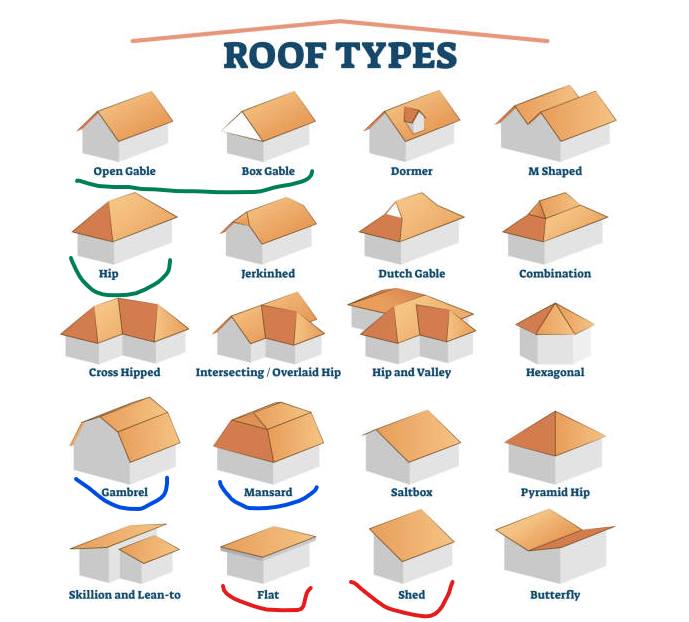

In [41]:
roofmatl_mapping = {
    'ClyTile': 8,  # Clay or Tile - often considered premium due to durability and aesthetic
    'CompShg': 7,  # Standard (Composite) Shingle - widely used, effective balance of cost and performance
    'Membran': 6,  # Membrane - used in flat roofs, durable and waterproof
    'Metal': 5,    # Metal - durable, long-lasting, and energy-efficient
    'Roll': 4,     # Roll - simpler and cost-effective, often used in low slope roofs
    'Tar&Grv': 3,  # Gravel & Tar - traditional, for flat roofs, requires more maintenance
    'WdShake': 2,  # Wood Shakes - aesthetic appeal but requires maintenance and has durability concerns
    'WdShngl': 1   # Wood Shingles - similar to shakes but thinner, less durable
}

train_df['RoofMatl'] = train_df['RoofMatl'].replace(roofmatl_mapping)
test_df['RoofMatl'] = test_df['RoofMatl'].replace(roofmatl_mapping)


### Converting MasVnrType

In [42]:
masvnrtype_mapping = {
    'Stone': 5,    # Stone - often considered premium for its aesthetic and durability
    'BrkFace': 4,  # Brick Face - highly valued for its appearance and traditional appeal
    'BrkCmn': 3,   # Brick Common - less desired than Brick Face but still durable
    'CBlock': 2,   # Cinder Block - practical, but less commonly used for aesthetic purposes
    'None': 1      # None - indicating no masonry veneer is present
}

train_df['MasVnrType'] = train_df['MasVnrType'].replace(masvnrtype_mapping)
test_df['MasVnrType'] = test_df['MasVnrType'].replace(masvnrtype_mapping)


### Converting Fence

Fence: Fence quality

       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence

In [43]:
fence_mapping = {
    'GdPrv': 5,    # Stone - often considered premium for its aesthetic and durability
    'MnPrv': 4,  # Brick Face - highly valued for its appearance and traditional appeal
    'GdWo': 3,   # Brick Common - less desired than Brick Face but still durable
    'MnWw': 2,   # Cinder Block - practical, but less commonly used for aesthetic purposes
    'None': 1,
      np.nan: 1,
      'NA':1    # None - indicating no masonry veneer is present
}

train_df['Fence'] = train_df['Fence'].replace(fence_mapping)
test_df['Fence'] = test_df['Fence'].replace(fence_mapping)

# Feature engeneering

## Adding 4 new fetures

### 1. Neighborhood_class

We create new feature indicating about the Neighborhood class (rather luxurious or not)

In [44]:
train_df["Neighborhood"].value_counts()

Neighborhood
NAmes      145
CollgCr    106
OldTown     77
Somerst     76
Edwards     75
Gilbert     68
NridgHt     60
Sawyer      56
NWAmes      55
SawyerW     50
Crawfor     45
BrkSide     44
Mitchel     41
Timber      36
NoRidge     34
IDOTRR      28
StoneBr     25
ClearCr     21
BrDale      21
Blmngtn     21
MeadowV     21
SWISU       19
NPkVill     19
Veenker     15
Blueste     10
Name: count, dtype: int64

Study (Thesis) that shows that the neighborhood is an important predictor: https://www.diva-portal.org/smash/get/diva2:1765541/FULLTEXT01.pdf

LINK: Best neighborhoods in Ames: https://blog.kurby.ai/the-10-best-neighborhoods-in-ames-iowa/
1. Somerset
2. Northridge Heights
3. South Campus Area
4. Old Town
5. West Ames
6. Stone Brooke
7. Oakwood
8. Bloomington Heights
9. College Creek
10. Edwards

In [45]:
list_of_luxurious_neighborhoods = ["Somerst","NridgHt","SWISU","OldTown","NWAmes","StoneBr","Blmngtn","CollgCr","Edwards"]

train_df['Neighborhood_bin'] = train_df.Neighborhood.isin(list_of_luxurious_neighborhoods).map({False: 0, True:1})
test_df['Neighborhood_bin'] = test_df.Neighborhood.isin(list_of_luxurious_neighborhoods).map({False: 0, True:1})

train_df["Neighborhood_bin"].value_counts()

Neighborhood_bin
0    654
1    514
Name: count, dtype: int64

### 2. Sum of qualities:

The sum of qualities sums up all the qualities that are in the data into one overall quality of the property.
We assume it will indicate something about "how good" the property is

In [46]:
list_of_qualities = ["OverallQual", "ExterQual","BsmtQual","HeatingQC","KitchenQual","FireplaceQu","GarageQual","PoolQC","Fence"]
train_df['sum_of_qualities'] = train_df[list_of_qualities].fillna(0).sum(axis=1)
test_df['sum_of_qualities'] = test_df[list_of_qualities].fillna(0).sum(axis=1)

<Axes: xlabel='sum_of_qualities', ylabel='SalePrice'>

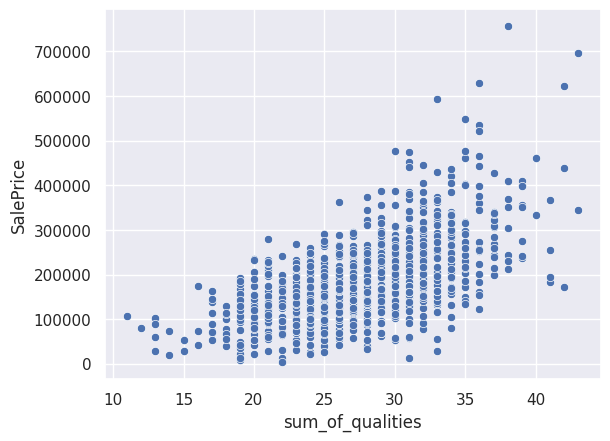

In [47]:
column = "sum_of_qualities"
sns.scatterplot(x='sum_of_qualities', y='SalePrice', data=train_df)

### 3. sum of qualities sqared

The sum of squares of the qualities sums up all the square of the qualities.
We want to try and give high weight to outstanding qualities

<Axes: xlabel='sum_of_qualities_squared', ylabel='SalePrice'>

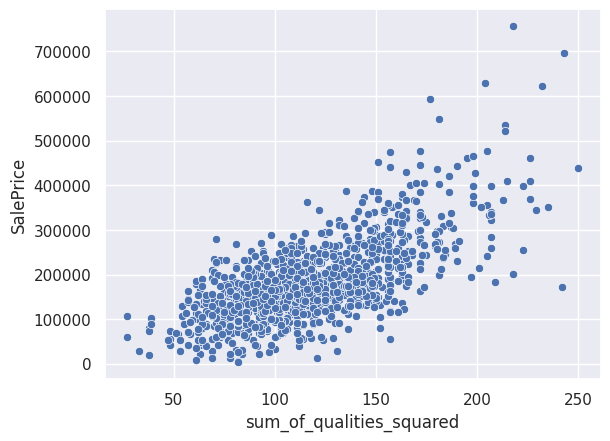

In [48]:
train_df['sum_of_qualities_squared'] = np.square(train_df[list_of_qualities].fillna(0)).sum(axis=1)
test_df['sum_of_qualities_squared'] = np.square(test_df[list_of_qualities].fillna(0)).sum(axis=1)
column = "sum_of_qualities_squared"
sns.scatterplot(x='sum_of_qualities_squared', y='SalePrice', data=train_df)

### 4. Create time series based on YYYY, MM

In [49]:
train_df["day"] = 1
train_df["date_timestamp"] = pd.to_datetime(train_df[["YrSold","MoSold","day"]].rename(columns={"YrSold": "year", "MoSold": "month"}))

test_df["day"] = 1
test_df["date_timestamp"] = pd.to_datetime(test_df[["YrSold","MoSold","day"]].rename(columns={"YrSold": "year", "MoSold": "month"}))

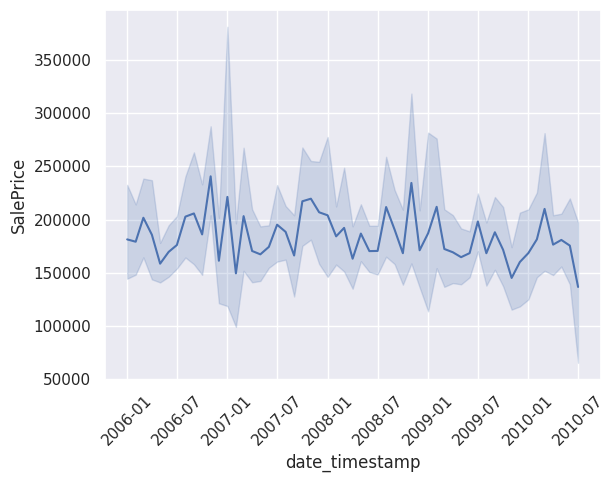

In [50]:
column = "date_timestamp"
g =sns.lineplot(x='date_timestamp', y='SalePrice', data=train_df)
g.tick_params(axis='x', rotation=45)

During these times there was a financial crisis. We will try to take it into account:
https://en.wikipedia.org/wiki/2007%E2%80%932008_financial_crisis

We assume that adding a binary representation to the crisis could be beneficial to the model

#### We will divide the datapoints into two groups. before the crisis and after the crisis.

In [51]:
crisis_cutoff = pd.Timestamp("2008-07-01")  # July 1st, 2008

# Create the binary variable
train_df["crisis_bin"] = (train_df["date_timestamp"] > crisis_cutoff).astype(int)
test_df["crisis_bin"] = (test_df["date_timestamp"] > crisis_cutoff).astype(int)

train_df["crisis_bin"].value_counts()

crisis_bin
0    682
1    486
Name: count, dtype: int64

In [52]:
train_df = train_df.drop("date_timestamp", axis=1)
test_df = test_df.drop("date_timestamp", axis=1)

## One hot encoder for categorical non ordinal columns

In [53]:
object_columns = train_df.select_dtypes(exclude=['int64','float64']).columns.tolist()
train_df[object_columns+["SalePrice"]]

MSZoning Neighborhood Condition1 Condition2 Exterior1st Exterior2nd  \
0          RL      CollgCr       Norm       Norm     VinylSd     VinylSd   
1          RL        NAmes       Norm       Norm     Wd Sdng     Wd Sdng   
2          RL       Sawyer       RRNn       Norm     MetalSd     MetalSd   
3          RM      MeadowV       Norm       Norm     CemntBd     CmentBd   
4          RL        NAmes       Norm       Norm     VinylSd     Plywood   
...       ...          ...        ...        ...         ...         ...   
1163       RH      Somerst       Norm       Norm     VinylSd     VinylSd   
1164       RL      Gilbert       Norm      Feedr     VinylSd       Other   
1165       RL        NAmes       Norm       Norm     MetalSd     MetalSd   
1166       RL      CollgCr       Norm       Norm     VinylSd     VinylSd   
1167       RL        NAmes       Norm       Norm     Plywood     MetalSd   

     Heating Electrical GarageType MiscFeature SaleCondition      SalePrice  
0      Floor      SBrkr     Attchd         NaN        Normal  155664.570167  
1       GasA      SBrkr     Detchd         NaN        Normal  192977.232227  
2       Wall      SBrkr     Detchd         NaN        Normal  142885.167896  
3       Grav        Mix        NaN         NaN        Normal   84625.216884  
4       GasA      SBrkr     Attchd         NaN       Abnorml  131905.509480  
...      ...        ...        ...         ...           ...            ...  
1163    GasA      SBrkr     Attchd         NaN       Partial  309236.546058  
1164    Grav      SBrkr    BuiltIn         NaN       Partial  274801.472116  
1165    GasA      SBrkr     Attchd        Shed        Normal   99352.386689  
1166    GasA      SBrkr     Attchd         NaN        Normal  216178.492861  
1167    GasA      SBrkr     Attchd         NaN        Normal  229305.345395  

[1168 rows x 12 columns]

In [54]:
 # MSSubClass is categorical thats not 'object' type
categorical_columns = ["MSSubClass"] + object_columns

# Create dummy variables
df_dummies = pd.get_dummies(train_df, columns=categorical_columns, dummy_na=True, dtype=int)
df_dummies2 = pd.get_dummies(test_df, columns=categorical_columns, dummy_na=True, dtype=int)
train_df = df_dummies
test_df = df_dummies2

In [55]:
train_df

LotFrontage       LotArea  Street  Alley  LotShape  LandContour  \
0      114.599056  12976.322829       1      0         4            4   
1       66.959348  15594.194525       1      0         2            3   
2             NaN  12391.795255       1      0         1            4   
3       24.568303   1936.000000       1      3         4            4   
4             NaN  25084.792141       1      0         1            4   
...           ...           ...     ...    ...       ...          ...   
1163    59.027786   4230.000000       1      2         4            4   
1164   166.838245  24067.493623       1      0         4            2   
1165    73.969983   3569.588796       1      0         4            2   
1166    61.339192   8154.295481       1      0         4            4   
1167   100.532662   2436.890878       1      0         3            4   

      Utilities  LotConfig  LandSlope  BldgType  HouseStyle  OverallQual  \
0             4          2          3         5           4            7   
1             4          2          1         5           8            5   
2             4          5          3         5           2            5   
3             4          2          3         2           6            4   
4             4          2          3         5           2            5   
...         ...        ...        ...       ...         ...          ...   
1163          4          3          2         2           2            7   
1164          4          1          1         5           8            7   
1165          4          2          3         5           2            6   
1166          4          2          3         5           6            7   
1167          4          2          2         5           2            7   

      OverallCond    YearBuilt  YearRemodAdd  RoofStyle  RoofMatl  MasVnrType  \
0               5  2018.022763   1997.967142          1         7         4.0   
1               8  1940.100777   1994.519936          1         7         NaN   
2               5  1959.392421   1971.914206          1         2         4.0   
3               6  1991.475740   1971.721880          1         7         5.0   
4               5  1971.109318   1967.476198          4         7         4.0   
...           ...          ...           ...        ...       ...         ...   
1163            5  2003.806003   2013.038906          1         2         NaN   
1164            5  2001.267888   2010.251726          2         7         NaN   
1165            6  1949.629658   1949.531758          4         8         4.0   
1166            5  1977.742103   2014.436002          2         7         NaN   
1167            6  1999.163084   1990.150391          1         7         4.0   

       MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  \
0      136.767388          4          3           3       4.0       3.0   
1      183.575823          3          3           3       3.0       3.0   
2       31.000000          3          4           3       5.0       1.0   
3       62.585902          3          3           3       2.0       3.0   
4      243.588810          3          1           3       3.0       NaN   
...           ...        ...        ...         ...       ...       ...   
1163     0.000000          3          3           3       3.0       4.0   
1164     0.000000          4          3           3       5.0       4.0   
1165   311.807567          3          3           3       3.0       4.0   
1166     0.000000          4          3           3       4.0       3.0   
1167  1042.537511          3          4           2       4.0       3.0   

      BsmtExposure  BsmtFinType1   BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
0              1.0           6.0   573.264362           1.0    0.000000   
1              1.0           2.0   891.848313           1.0  198.861197   
2              NaN           4.0   163.946824           NaN  130.753960   
3              3.0           4.0    85.096

# Imputing Missing values

Some values were filled during the process as explained above.

We want to check which columns still contain nan.

In [56]:
check_nulls(train_df)

These columns contain NAN values:
-----------
The num of nulls in column LotFrontage is: 205
The num of nulls in column MasVnrType is: 649
The num of nulls in column MasVnrArea is: 6
The num of nulls in column BsmtQual is: 67
The num of nulls in column BsmtCond is: 74
The num of nulls in column BsmtExposure is: 67
The num of nulls in column BsmtFinType1 is: 56
The num of nulls in column BsmtFinType2 is: 51
The num of nulls in column FireplaceQu is: 469
The num of nulls in column GarageYrBlt is: 66
The num of nulls in column GarageFinish is: 104
The num of nulls in column GarageQual is: 98
The num of nulls in column GarageCond is: 92
The num of nulls in column PoolQC is: 962
-----------
The total number of columns that contain NAN values is 14


['LotFrontage',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'FireplaceQu',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC']

In [57]:
train_df.dtypes.unique()

array([dtype('float64'), dtype('int64')], dtype=object)

### handling missing values (Numeric)

**A method to impute missing values is to use mice imputer (numeric columns only) - which we have studied in class!**

We will use it to fill all the remaining nulls.

In [58]:
kernel = mf.ImputationKernel(data=train_df, save_all_iterations=True, random_state=42)

# Run the MICE algorithm for 20 iterations on each of the datasets
kernel.mice(15, verbose=True)
train_df_no_nulls = kernel.complete_data(dataset=0, inplace=False)
test_df_no_nulls = kernel.complete_data(dataset=0, inplace=False)

Initialized logger with name mice 1-15
Dataset 0
1  | MasVnrArea | BsmtFinType2 | BsmtFinType1 | GarageYrBlt | BsmtQual | BsmtExposure | BsmtCond | GarageCond | GarageQual | GarageFinish | LotFrontage | FireplaceQu | MasVnrType | PoolQC
2  | MasVnrArea | BsmtFinType2 | BsmtFinType1 | GarageYrBlt | BsmtQual | BsmtExposure | BsmtCond | GarageCond | GarageQual | GarageFinish | LotFrontage | FireplaceQu | MasVnrType | PoolQC
3  | MasVnrArea | BsmtFinType2 | BsmtFinType1 | GarageYrBlt | BsmtQual | BsmtExposure | BsmtCond | GarageCond | GarageQual | GarageFinish | LotFrontage | FireplaceQu | MasVnrType | PoolQC
4  | MasVnrArea | BsmtFinType2 | BsmtFinType1 | GarageYrBlt | BsmtQual | BsmtExposure | BsmtCond | GarageCond | GarageQual | GarageFinish | LotFrontage | FireplaceQu | MasVnrType | PoolQC
5  | MasVnrArea | BsmtFinType2 | BsmtFinType1 | GarageYrBlt | BsmtQual | BsmtExposure | BsmtCond | GarageCond | GarageQual | GarageFinish | LotFrontage | FireplaceQu | MasVnrType | PoolQC
6  | MasVnr

In [59]:
check_nulls(train_df_no_nulls)

These columns contain NAN values:
-----------
-----------
The total number of columns that contain NAN values is 0


[]

In [ ]:
check_nulls(test_df_no_nulls)

All nulls are filled

In [60]:
train_df_no_nulls.describe()

LotFrontage        LotArea       Street        Alley     LotShape  \
count  1168.000000    1168.000000  1168.000000  1168.000000  1168.000000   
mean     71.047535   10804.705781     0.899829     0.447774     3.350171   
std      27.117856    9332.370975     0.300357     0.977385     0.856339   
min       3.062877      30.644018     0.000000     0.000000     1.000000   
25%      54.614654    5918.750000     1.000000     0.000000     3.000000   
50%      70.108609    9641.304314     1.000000     0.000000     4.000000   
75%      85.203769   13652.260887     1.000000     0.000000     4.000000   
max     312.997838  167592.229562     1.000000     3.000000     4.000000   

       LandContour    Utilities    LotConfig    LandSlope    BldgType  \
count  1168.000000  1168.000000  1168.000000  1168.000000  1168.00000   
mean      3.574486     3.792808     2.454623     2.732021     4.29024   
std       0.868135     0.609732     0.915259     0.596421     1.15863   
min       1.000000     2.000000     1.000000     1.000000     2.00000   
25%       4.000000     4.000000     2.000000     3.000000     4.00000   
50%       4.000000     4.000000     2.000000     3.000000     5.00000   
75%       4.000000     4.000000     3.000000     3.000000     5.00000   
max       4.000000     4.000000     5.000000     3.000000     5.00000   

        HouseStyle  OverallQual  OverallCond    YearBuilt  YearRemodAdd  \
count  1168.000000  1168.000000  1168.000000  1168.000000   1168.000000   
mean      4.095890     6.087329     5.573630  1971.616372   1984.262104   
std       2.274869     1.398093     1.119152    33.491293     23.294882   
min       1.000000     1.000000     1.000000  1859.992440   1919.368439   
25%       2.000000     5.000000     5.000000  1949.035586   1966.560725   
50%       3.000000     6.000000     5.000000  1974.850829   1988.398016   
75%       7.000000     7.000000     6.000000  1997.698636   2003.149146   
max       8.000000    10.000000     9.000000  2046.355273   2037.311524   

         RoofStyle     RoofMatl   MasVnrType   MasVnrArea    ExterQual  \
count  1168.000000  1168.000000  1168.000000  1168.000000  1168.000000   
mean      1.958048     6.452911     4.056507   127.954062     3.439212   
std       1.469759     1.510719     0.538390   185.280703     0.721612   
min       1.000000     1.000000     3.000000     0.000000     2.000000   
25%       1.000000     7.000000     4.000000     0.000000     3.000000   
50%       1.000000     7.000000     4.000000    61.139121     3.000000   
75%       3.250000     7.000000     4.000000   174.800948     4.000000   
max       6.000000     8.000000     5.000000  1733.701541     5.000000   

         ExterCond  Foundation     BsmtQual     BsmtCond  BsmtExposure  \
count  1168.000000  1168.00000  1168.000000  1168.000000   1168.000000   
mean      3.074486     2.68750     3.566781     2.911815      1.859589   
std       0.686833     0.60343     0.768260     0.582461      1.124234   
min       1.000000     1.00000     2.000000     1.000000      1.000000   
25%       3.000000     3.00000     3.000000     3.000000      1.000000   
50%       3.000000     3.00000     4.000000     3.000000      1.000000   
75%       3.000000     3.00000     4.000000     3.000000      3.000000   
max       5.000000     3.00000     5.000000     4.000000      4.000000   

       BsmtFinType1   BsmtFinSF1  BsmtFinType2   BsmtFinSF2    BsmtUnfSF  \
count   1168.000000  1168.000000   1168.000000  1168.000000  1168.000000   
mean       3.621575   491.518248      1.780822    75.056067   593.875755   
std        1.970375   469.624051      1.499469   157.901653   467.269470   
min        1.000000     0.000000      1.000000     0.000000     0.000000   
25%        1.000000   106.085804      1.000000     0.000000   238.966969   
50%        4.000000   394.934987      1.000000    16.684170   495.526173   
75%        6.000000   749.113521      2.000000    81.053367   836.426097   
max        6.000000  5695.300016      6.000000

# Outlier removal


(For the train data only)

In [61]:
cont = 0.01

features = train_df_no_nulls.drop(columns=['SalePrice'])
labels = train_df_no_nulls['SalePrice']

# Create and fit the Isolation Forest model
iso = IsolationForest(contamination=cont)
yhat = iso.fit_predict(features)

# Mask out the outliers
mask = yhat != -1
df_after_outlier_removal = features[mask]
labels_after_outlier_removal = labels[mask]

df_after_outlier_removal = pd.concat([df_after_outlier_removal, labels_after_outlier_removal], axis=1)
train_df = df_after_outlier_removal

# Data normalization & Scaling

We take the feature tham seem to have a normal distribution (ish) and scale them with a standart scaler.

All the other columns will be scaled using min-max scaler

In [62]:
# List of columns that we have seen in the data exploration that have normal distribution properties
col_norm = ['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageArea', 'GarageYrBlt', 'TotRmsAbvGrd', 'sum_of_qualities', 'sum_of_qualities_squared']

In [63]:
# Separating the label
y_train = train_df['SalePrice']
X_train = train_df.drop(columns=['SalePrice'])

# List of columns for Min-Max scaling (excluding the ones for standard scaling)
col_minmax = [col for col in X_train.columns if col not in col_norm]

# Creating the ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[('norm', StandardScaler(), col_norm),('minmax', MinMaxScaler(), col_minmax)])

train_df_scaled = preprocessor.fit_transform(X_train)
test_df_scaled =  preprocessor.transform(test_df)

train_df_scaled = pd.DataFrame(train_df_scaled, columns=col_norm + col_minmax, index=X_train.index)
test_df_scaled = pd.DataFrame(test_df_scaled, columns=col_norm + col_minmax, index=test_df.index)

train_df_scaled['SalePrice'] = y_train

train_df = train_df_scaled
test_df = test_df_scaled

train_df.head()

LotFrontage  OverallQual  YearBuilt  YearRemodAdd  TotalBsmtSF  1stFlrSF  \
0     1.677703     0.669425   1.392029      0.586484    -0.077540 -0.647755   
1    -0.144311    -0.792058  -0.964130      0.438528    -1.280824 -0.390211   
2     0.169424    -0.792058  -0.380801     -0.531719    -0.095712 -0.410920   
3    -1.765587    -1.522800   0.589316     -0.539974    -1.606485 -1.588407   
4     1.493674    -0.792058  -0.026512     -0.722201     0.422888  0.353807   

   GrLivArea  GarageArea  GarageYrBlt  TotRmsAbvGrd  sum_of_qualities  \
0   0.419557    0.222943     1.406850      0.328686          0.302962   
1   1.552558   -0.391250    -0.906877      0.961955         -0.308961   
2  -0.363102   -0.656879    -0.589762     -0.937851         -0.308961   
3  -1.557306   -2.022766     0.179398     -2.204389         -1.532808   
4  -1.436997   -0.460781     0.616716     -0.304583         -0.716910   

   sum_of_qualities_squared   LotArea  Street  Alley  LotShape  LandContour  \
0                  0.682315  0.077259     1.0    0.0  1.000000     1.000000   
1                 -0.423935  0.092883     1.0    0.0  0.333333     0.666667   
2                 -0.423935  0.073771     1.0    0.0  0.000000     1.000000   
3                 -1.331627  0.011371     1.0    1.0  1.000000     1.000000   
4                 -0.764320  0.149522     1.0    0.0  0.000000     1.000000   

   Utilities  LotConfig  LandSlope  BldgType  HouseStyle  OverallCond  \
0        1.0       0.25        1.0       1.0    0.428571     0.428571   
1        1.0       0.25        0.0       1.0    1.000000     0.857143   
2        1.0       1.00        1.0       1.0    0.142857     0.428571   
3        1.0       0.25        1.0       0.0    0.714286     0.571429   
4        1.0       0.25        1.0       1.0    0.142857     0.428571   

   RoofStyle  RoofMatl  MasVnrType  MasVnrArea  ExterQual  ExterCond  \
0        0.0  0.857143         0.5    0.078888   0.666667       0.50   
1        0.0  0.857143         0.5    0.105887   0.333333       0.50   
2        0.0  0.142857         0.5    0.017881   0.333333       0.75   
3        0.0  0.857143         1.0    0.036100   0.333333       0.50   
4        0.6  0.857143         0.5    0.140502   0.333333       0.00   

   Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  \
0         1.0  0.666667  0.666667      0.000000           1.0    0.229410   
1         1.0  0.333333  0.666667      0.000000           0.2    0.356901   
2         1.0  1.000000  0.000000      0.000000           0.6    0.065608   
3         1.0  0.000000  0.666667      0.666667           0.6    0.034054   
4         1.0  0.333333  0.666667      0.000000           0.4    0.402067   

   BsmtFinType2  BsmtFinSF2  BsmtUnfSF  HeatingQC  CentralAir  2ndFlrSF  \
0           0.0    0.000000   0.310580       1.00         1.0  0.340999   
1           0.0    0.135277   0.098669       1.00         1.0  0.201481   
2           0.0    0.088947   0.056768       0.50         1.0  0.115283   
3           1.0    0.269313   0.000000       0.75         1.0  0.023161   
4           0.4    0.033050   0.168430       0.25         1.0  0.097647   

   LowQualFinSF  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0      0.017385      0.000000           0.0  0.666667       0.5      0.500000   
1      0.807672      0.000000           0.0  0.666667       0.5      0.666667   
2      0.000000      0.000000           0.0  0.333333       0.0      0.500000   
3      0.067839      0.333333           0.0  0.333333       0.0      0.166667   
4      0.000000      0.333333           0.0  0.333333       0.0      0.500000   

   KitchenAbvGr  KitchenQual  Functional  Fireplaces  FireplaceQu  \
0           0.0     1.000000    0.333333    0.333333         0.50   
1           0.0     0.666667    0.833333    0.333333         0.75   
2           0.0     0.333333    0.000000    0.000000         0.75   
3           0.0     0.333333    1.000000    0.000000         0.25

# Save data checkpoint to reload processed data

In [64]:
 # Checkpoint to save reload the df so we won't have to run all cells again
train_df.reset_index().drop("index", axis=1).to_csv(f"train_df_for_modeling_{cont}.csv")
test_df.reset_index().drop("index", axis=1).to_csv(f"test_df_for_modeling_{cont}.csv")

In [65]:
train_df = pd.read_csv(f"train_df_for_modeling_{cont}.csv", index_col=0)
test_df = pd.read_csv(f"test_df_for_modeling_{cont}.csv", index_col=0)

train_df.head()

LotFrontage  OverallQual  YearBuilt  YearRemodAdd  TotalBsmtSF  1stFlrSF  \
0     1.677703     0.669425   1.392029      0.586484    -0.077540 -0.647755   
1    -0.144311    -0.792058  -0.964130      0.438528    -1.280824 -0.390211   
2     0.169424    -0.792058  -0.380801     -0.531719    -0.095712 -0.410920   
3    -1.765587    -1.522800   0.589316     -0.539974    -1.606485 -1.588407   
4     1.493674    -0.792058  -0.026512     -0.722201     0.422888  0.353807   

   GrLivArea  GarageArea  GarageYrBlt  TotRmsAbvGrd  sum_of_qualities  \
0   0.419557    0.222943     1.406850      0.328686          0.302962   
1   1.552558   -0.391250    -0.906877      0.961955         -0.308961   
2  -0.363102   -0.656879    -0.589762     -0.937851         -0.308961   
3  -1.557306   -2.022766     0.179398     -2.204389         -1.532808   
4  -1.436997   -0.460781     0.616716     -0.304583         -0.716910   

   sum_of_qualities_squared   LotArea  Street  Alley  LotShape  LandContour  \
0                  0.682315  0.077259     1.0    0.0  1.000000     1.000000   
1                 -0.423935  0.092883     1.0    0.0  0.333333     0.666667   
2                 -0.423935  0.073771     1.0    0.0  0.000000     1.000000   
3                 -1.331627  0.011371     1.0    1.0  1.000000     1.000000   
4                 -0.764320  0.149522     1.0    0.0  0.000000     1.000000   

   Utilities  LotConfig  LandSlope  BldgType  HouseStyle  OverallCond  \
0        1.0       0.25        1.0       1.0    0.428571     0.428571   
1        1.0       0.25        0.0       1.0    1.000000     0.857143   
2        1.0       1.00        1.0       1.0    0.142857     0.428571   
3        1.0       0.25        1.0       0.0    0.714286     0.571429   
4        1.0       0.25        1.0       1.0    0.142857     0.428571   

   RoofStyle  RoofMatl  MasVnrType  MasVnrArea  ExterQual  ExterCond  \
0        0.0  0.857143         0.5    0.078888   0.666667       0.50   
1        0.0  0.857143         0.5    0.105887   0.333333       0.50   
2        0.0  0.142857         0.5    0.017881   0.333333       0.75   
3        0.0  0.857143         1.0    0.036100   0.333333       0.50   
4        0.6  0.857143         0.5    0.140502   0.333333       0.00   

   Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  \
0         1.0  0.666667  0.666667      0.000000           1.0    0.229410   
1         1.0  0.333333  0.666667      0.000000           0.2    0.356901   
2         1.0  1.000000  0.000000      0.000000           0.6    0.065608   
3         1.0  0.000000  0.666667      0.666667           0.6    0.034054   
4         1.0  0.333333  0.666667      0.000000           0.4    0.402067   

   BsmtFinType2  BsmtFinSF2  BsmtUnfSF  HeatingQC  CentralAir  2ndFlrSF  \
0           0.0    0.000000   0.310580       1.00         1.0  0.340999   
1           0.0    0.135277   0.098669       1.00         1.0  0.201481   
2           0.0    0.088947   0.056768       0.50         1.0  0.115283   
3           1.0    0.269313   0.000000       0.75         1.0  0.023161   
4           0.4    0.033050   0.168430       0.25         1.0  0.097647   

   LowQualFinSF  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0      0.017385      0.000000           0.0  0.666667       0.5      0.500000   
1      0.807672      0.000000           0.0  0.666667       0.5      0.666667   
2      0.000000      0.000000           0.0  0.333333       0.0      0.500000   
3      0.067839      0.333333           0.0  0.333333       0.0      0.166667   
4      0.000000      0.333333           0.0  0.333333       0.0      0.500000   

   KitchenAbvGr  KitchenQual  Functional  Fireplaces  FireplaceQu  \
0           0.0     1.000000    0.333333    0.333333         0.50   
1           0.0     0.666667    0.833333    0.333333         0.75   
2           0.0     0.333333    0.000000    0.000000         0.75   
3           0.0     0.333333    1.000000    0.000000         0.25

# Feature selection and train models

## *PCA*

We decided not to use PCA eventually

In [66]:
# # Create a PCA instance and fit it to the scaled data
# df = train_df_scaled.drop("SalePrice", axis=1)
# pca = PCA()
# pca.fit(df)

# # Calculate the number of components required to retain 95% of the variance
# cumulative_variance_ratio = pca.explained_variance_ratio_.cumsum()
# num_components = np.argmax(cumulative_variance_ratio >= 0.95) + 1

# # Use the determined number of components to perform PCA
# pca = PCA(n_components=num_components)
# pca_result = pca.fit_transform(df)

# num_components

In [67]:
# train_df = pd.DataFrame(pca_result)
# train_df["SalePrice"] = train_df_scaled["SalePrice"]

## Feature selection using random forest

In [68]:
def select_k_best_features_rf_regression(train_df, feature_cols, target_col, test_size=0.2, random_state=3):
    X = train_df[feature_cols]
    y = train_df[target_col]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    results = []
    for k in range(1, len(feature_cols) + 1):
        selector = SelectKBest(score_func=f_regression, k=k)
        X_train_new = selector.fit_transform(X_train, y_train)
        X_test_new = selector.transform(X_test)

        rf = RandomForestRegressor(n_estimators=100, random_state=random_state)
        rf.fit(X_train_new, y_train)

        y_train_pred = rf.predict(X_train_new)
        y_test_pred = rf.predict(X_test_new)

        train_mse = mean_squared_error(y_train, y_train_pred)
        test_mse = mean_squared_error(y_test, y_test_pred)

        train_mae = mean_absolute_error(y_train, y_train_pred)
        test_mae = mean_absolute_error(y_test, y_test_pred)

        train_r2 = r2_score(y_train, y_train_pred)
        test_r2 = r2_score(y_test, y_test_pred)

        # Calculate adjusted R-squared
        n = len(y_train)
        k = X_train_new.shape[1]
        adj_r2_train = 1 - ((1 - train_r2) * (n - 1) / (n - k - 1))

        n = len(y_test)
        k = X_test_new.shape[1]
        adj_r2_test = 1 - ((1 - test_r2) * (n - 1) / (n - k - 1))

        features = [feature_cols[i] for i in selector.get_support(indices=True)]

        result = {'k': k, 'features': features, 'train_mse': train_mse, 'test_mse': test_mse, 'train_mae': train_mae, 'test_mae': test_mae,
                  'train_r2': train_r2, 'test_r2': test_r2,
                  'adj_r2_train': adj_r2_train, 'adj_r2_test': adj_r2_test}

        results.append(result)

    train_df_results = pd.DataFrame(results)

    fig = go.Figure()
    # fig.add_trace(go.Scatter(x=train_df_results['k'], y=train_df_results['train_mse'], name='Train MSE'))
    # fig.add_trace(go.Scatter(x=train_df_results['k'], y=train_df_results['test_mse'], name='Test MSE'))
    fig.add_trace(go.Scatter(x=train_df_results['k'], y=train_df_results['train_mae'], name='Train MAE'))
    fig.add_trace(go.Scatter(x=train_df_results['k'], y=train_df_results['test_mae'], name='Test MAE'))
    # fig.add_trace(go.Scatter(x=train_df_results['k'], y=train_df_results['train_r2'], name='Train R^2'))
    # fig.add_trace(go.Scatter(x=train_df_results['k'], y=train_df_results['test_r2'], name='Test R^2'))
    # fig.add_trace(go.Scatter(x=train_df_results['k'], y=train_df_results['adj_r2_train'], name='Adj. Train R^2'))
    # fig.add_trace(go.Scatter(x=train_df_results['k'], y=train_df_results['adj_r2_test'], name='Adj. Test R^2'))

    fig.update_layout(title='RF feature selection for Regression', xaxis_title='k', yaxis_title='Score')
    fig.show()

    return train_df_results

In [69]:
res = select_k_best_features_rf_regression(train_df, train_df.drop("SalePrice",axis=1).columns ,target_col="SalePrice")

As we can see in the plot above, at some point, the graph reaches a plateau.

Therefore, there is no reason to pursue a slightly better score when the dimension is much higher.

After reviewing the interactive graph, we have decided to select k=20 features. We see this as a point of balance between the score and the risk of overfitting.

In [70]:
 # Checkpoint to save reload the res so we won't have to run all cells again
res.reset_index().drop("index", axis=1).to_csv(f"res_{cont}.csv")

In [71]:
res = pd.read_csv(f"res_{cont}.csv", index_col=0)

## XGBoost

We have selected this model after reading this paper:

[Paper about the advantages of XGBoost in houspricing predictions](https://doi.org/10.3390/analytics3010003)


**We used optuna to tune the hyper-parameters**

In [72]:
def train_optimize_xgboost_optuna(train_df, target_col, features, n_trials=20, n_splits=5, random_state=42):
    X = train_df[features]
    y = train_df[target_col]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

    # Define the objective function for Optuna
    def objective(trial):
        param = {
            'n_estimators': trial.suggest_int('n_estimators', 30, 1500),
            'max_depth': trial.suggest_int('max_depth', 3, 12),
            'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
            'learning_rate': trial.suggest_float('learning_rate', 1e-4, 0.1),
            'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
            'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.2, 0.8),
            'reg_alpha': trial.suggest_categorical('reg_alpha', [0, 0.1, 0.5]),
            'reg_lambda': trial.suggest_categorical('reg_lambda', [1, 2, 5]),
            'objective': 'reg:absoluteerror',
            'random_state': random_state}


        # Cross-validation within the trial
        kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)
        xgb_model = XGBRegressor(**param)
        cv_scores = []
        for train_index, val_index in kf.split(X_train):
            xgb_model.fit(X_train.iloc[train_index], y_train.iloc[train_index],
                          eval_set=[(X_train.iloc[val_index], y_train.iloc[val_index])],
                          early_stopping_rounds=50, verbose=False)
            predictions = xgb_model.predict(X_train.iloc[val_index])
            cv_scores.append(mean_absolute_error(y_train.iloc[val_index], predictions))

        # Negative MAE for minimization
        return np.mean(cv_scores)

    # Create an Optuna study object
    study = optuna.create_study(direction='minimize')
    study.optimize(objective, n_trials=n_trials)

    # Get the best hyperparameters
    best_params = study.best_params

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

    # Train the final model with optimized parameters
    best_xgb_model = XGBRegressor(**best_params, random_state=random_state)
    best_xgb_model.fit(X_train, y_train, eval_metric='mae', verbose=True)


    # Evaluate on the test set
    y_pred_test = best_xgb_model.predict(X_test)
    test_mae = mean_absolute_error(y_test, y_pred_test)
    print(f'Best Hyperparameters: {best_params}')
    print(f'Test Mean Absolute Error: {test_mae}')


    # Create a DataFrame for actual and predicted values
    scatter_data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})
    # Create a scatter plot with Plotly
    fig = px.scatter(scatter_data, x='Actual', y='Predicted', title='Actual vs Predicted Values for Test Set',
                     labels={'Actual': 'Actual Values', 'Predicted': 'Predicted Values'})
    # Add a diagonal line for perfect predictions
    fig.add_shape(type='line', line=dict(dash='dash'), x0=scatter_data['Actual'].min(), y0=scatter_data['Actual'].min(),
                  x1=scatter_data['Actual'].max(), y1=scatter_data['Actual'].max())

    fig.show()
    return best_xgb_model, test_mae

In [73]:
features_str = res[res["k"]==20]["features"].iloc[0]
features = ast.literal_eval(features_str)
xg_best_model, xg_test_mae = train_optimize_xgboost_optuna(train_df, target_col='SalePrice', features=features, n_trials=25)

[I 2024-05-08 17:32:40,089] A new study created in memory with name: no-name-77c7ebf1-e92a-4e21-8754-168339744882
[I 2024-05-08 17:32:47,401] Trial 0 finished with value: 41105.722109060844 and parameters: {'n_estimators': 1352, 'max_depth': 5, 'min_child_weight': 10, 'learning_rate': 0.013147281949847642, 'subsample': 0.9443103596827498, 'colsample_bytree': 0.7944057163309055, 'reg_alpha': 0.5, 'reg_lambda': 2}. Best is trial 0 with value: 41105.722109060844.
[I 2024-05-08 17:32:49,575] Trial 1 finished with value: 40318.58760773778 and parameters: {'n_estimators': 563, 'max_depth': 3, 'min_child_weight': 1, 'learning_rate': 0.019570724123513867, 'subsample': 0.9488305400165367, 'colsample_bytree': 0.2424191521512346, 'reg_alpha': 0, 'reg_lambda': 2}. Best is trial 1 with value: 40318.58760773778.
[I 2024-05-08 17:33:02,108] Trial 2 finished with value: 41409.59819948738 and parameters: {'n_estimators': 364, 'max_depth': 11, 'min_child_weight': 10, 'learning_rate': 0.01285384138752314

Best Hyperparameters: {'n_estimators': 563, 'max_depth': 3, 'min_child_weight': 1, 'learning_rate': 0.019570724123513867, 'subsample': 0.9488305400165367, 'colsample_bytree': 0.2424191521512346, 'reg_alpha': 0, 'reg_lambda': 2}
Test Mean Absolute Error: 37937.24180335686


**Save the best model**

In [74]:
xg_best_model.save_model(f'xgboost_model_{xg_test_mae}.json')

## Catboost

Since there were many categorial columns in the data, we think it make sense to try the Catboost algorithm..

In [77]:
def train_optimize_catboost_randomized(train_df, target_col, features, param_distributions, n_iter=10, n_splits=5, random_state=42):
    X = train_df[features]
    y = train_df[target_col]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

    cb_model = CatBoostRegressor(loss_function='MAE', random_seed=random_state, verbose=False)

    kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)

    # Perform Randomized Search with cross-validation
    random_search = RandomizedSearchCV(estimator=cb_model, param_distributions=param_distributions,
                                       scoring='neg_mean_absolute_error', cv=kf, n_iter=n_iter, random_state=random_state, verbose=3)
    random_search.fit(X_train, y_train)

    # Get the best hyperparameters & Train the final model with optimized parameters
    best_params = random_search.best_params_
    best_cb_model = CatBoostRegressor(**best_params, loss_function='MAE', random_seed=random_state, verbose=False)
    best_cb_model.fit(X_train, y_train)

    # Evaluate on the test set
    y_pred_test = best_cb_model.predict(X_test)
    test_mae = mean_absolute_error(y_test, y_pred_test)
    print(f'Best Hyperparameters: {best_params}')
    print(f'Test Mean Absolute Error: {test_mae}')

    # Create a DataFrame for actual and predicted values
    scatter_data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})

    # Create a scatter plot with Plotly
    fig = px.scatter(scatter_data, x='Actual', y='Predicted', title='Actual vs Predicted Values for Test Set',
                     labels={'Actual': 'Actual Values', 'Predicted': 'Predicted Values'})

    # Add a diagonal line for perfect predictions
    fig.add_shape(type='line', line=dict(dash='dash'), x0=scatter_data['Actual'].min(), y0=scatter_data['Actual'].min(),
                  x1=scatter_data['Actual'].max(), y1=scatter_data['Actual'].max())

    fig.show()
    return best_cb_model, test_mae

In [78]:
param_distributions = {
    'learning_rate': uniform(0.001, 0.2),  # Uniform distribution from 0.01 to 0.2
    'depth': randint(4, 11),  # Random integers from 4 to 10
    'iterations': randint(100, 1001),  # Random integers from 100 to 1000
    'l2_leaf_reg': randint(1, 8),  # Random integers from 1 to 7
    'border_count': randint(32, 129)  # Random integers from 32 to 128
    }

features_str = res[res["k"]==20]["features"].iloc[0]
features = ast.literal_eval(features_str)

cb_best_model, cb_test_mae = train_optimize_catboost_randomized(train_df, target_col='SalePrice', features=features, param_distributions=param_distributions,n_iter=10)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END border_count=83, depth=8, iterations=370, l2_leaf_reg=3, learning_rate=0.15693820005455386;, score=-45742.413 total time=   3.7s
[CV 2/5] END border_count=83, depth=8, iterations=370, l2_leaf_reg=3, learning_rate=0.15693820005455386;, score=-40555.857 total time=   2.5s
[CV 3/5] END border_count=83, depth=8, iterations=370, l2_leaf_reg=3, learning_rate=0.15693820005455386;, score=-40884.884 total time=   1.3s
[CV 4/5] END border_count=83, depth=8, iterations=370, l2_leaf_reg=3, learning_rate=0.15693820005455386;, score=-41229.604 total time=   1.3s
[CV 5/5] END border_count=83, depth=8, iterations=370, l2_leaf_reg=3, learning_rate=0.15693820005455386;, score=-49945.159 total time=   1.3s
[CV 1/5] END border_count=52, depth=10, iterations=221, l2_leaf_reg=3, learning_rate=0.02099498316360058;, score=-45070.976 total time=   1.5s
[CV 2/5] END border_count=52, depth=10, iterations=221, l2_leaf_reg=3, learning_rate=0

In [79]:
cb_best_model.save_model(f'cb_best_model_{cb_test_mae}.cbm', format='cbm')

## SVM

In [80]:
def train_optimize_svm_svr_randomized(train_df, target_col, features, param_distributions, n_iter=10, n_splits=5, random_state=42):
    X = train_df[features]
    y = train_df[target_col]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

    svr_model = SVR()

    kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)

    random_search = RandomizedSearchCV(estimator=svr_model, param_distributions=param_distributions,
                                       scoring='neg_mean_absolute_error', cv=kf, n_iter=n_iter, random_state=random_state, verbose=3)
    random_search.fit(X_train, y_train)

    best_params = random_search.best_params_

    # Train the final model with optimized parameters
    best_svr_model = SVR(**best_params)
    best_svr_model.fit(X_train, y_train)

    # Evaluate on the test set
    y_pred_test = best_svr_model.predict(X_test)
    test_mae = mean_absolute_error(y_test, y_pred_test)
    print(f'Best Hyperparameters: {best_params}')
    print(f'Test Mean Absolute Error: {test_mae}')

    scatter_data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})

    # Create a scatter plot with Plotly
    fig = px.scatter(scatter_data, x='Actual', y='Predicted', title='Actual vs Predicted Values for Test Set',
                     labels={'Actual': 'Actual Values', 'Predicted': 'Predicted Values'})

    # Add a diagonal line for perfect predictions
    fig.add_shape(type='line', line=dict(dash='dash'), x0=scatter_data['Actual'].min(), y0=scatter_data['Actual'].min(),
                  x1=scatter_data['Actual'].max(), y1=scatter_data['Actual'].max())

    fig.show()
    return best_svr_model, test_mae

In [81]:
param_distributions = {
    'C': loguniform(1e-2, 1e4),  # C will be sampled log-uniformly between 0.01 and 10000
    'gamma': loguniform(1e-4, 1e-1),  # gamma will be sampled log-uniformly between 0.0001 and 0.1
    'kernel': ['rbf'],  # Kernel can be one of these choices
    'degree': range(1, 6),  # If using polynomial kernel, degree can be between 1 and 5
    'coef0': uniform(-1, 2),  # For polynomial/sigmoid kernel, coef0 will be uniformly sampled from -1 to 1
}

features_str = res[res.test_mae == res.test_mae.min()]["features"].iloc[0]
features = ast.literal_eval(features_str)
best_model, test_mae = train_optimize_xgboost_randomized(train_df, target_col='SalePrice', features=features, param_distributions=param_distributions,n_iter=10)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END C=1.7670169402947955, coef0=0.9014286128198323, degree=3, gamma=0.021830968390524612, kernel=rbf;, score=-47528.628 total time=   0.8s
[CV 2/5] END C=1.7670169402947955, coef0=0.9014286128198323, degree=3, gamma=0.021830968390524612, kernel=rbf;, score=-45448.530 total time=   0.9s
[CV 3/5] END C=1.7670169402947955, coef0=0.9014286128198323, degree=3, gamma=0.021830968390524612, kernel=rbf;, score=-42895.926 total time=   3.2s
[CV 4/5] END C=1.7670169402947955, coef0=0.9014286128198323, degree=3, gamma=0.021830968390524612, kernel=rbf;, score=-41793.323 total time=   0.8s
[CV 5/5] END C=1.7670169402947955, coef0=0.9014286128198323, degree=3, gamma=0.021830968390524612, kernel=rbf;, score=-53405.809 total time=   0.8s
[CV 1/5] END C=38.11544088653062, coef0=-0.10833449429281772, degree=3, gamma=0.002386418878005608, kernel=rbf;, score=-47528.628 total time=   0.8s
[CV 2/5] END C=38.11544088653062, coef0=-0.1083344

# XAI

SHAP (SHapley Additive exPlanations) values are a popular method for explaining the output of machine learning models, particularly in complex models such as tree-based models and deep learning networks.

SHAP values provide a way to quantify the impact of each feature in a dataset on the prediction made by a model for each individual prediction.

SHAP values are derived from cooperative game theory, specifically from the Shapley values, which were originally formulated to determine the fair distribution of payouts to players depending on their contribution to the total payout. In the context of machine learning, SHAP values explain the contribution of each feature to the prediction in comparison to the average prediction across the dataset.

## First, We want to load our best model

In [82]:
# xg_best_model = XGBRegressor()
# xg_best_model.load_model(f'xgboost_model_{xg_test_mae}.json')


cb_loaded_model = CatBoostRegressor()
cb_loaded_model.load_model(f'cb_best_model_{cb_test_mae}.cbm', format='cbm')

## Global Interpretability

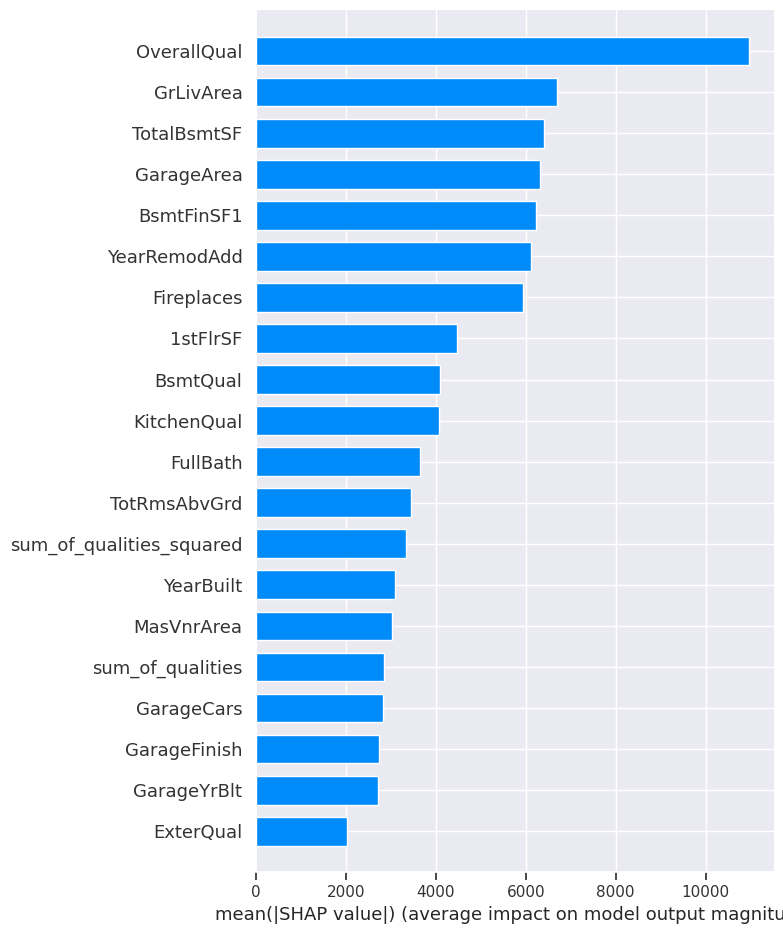

In [83]:
# List of selected features used by the model, update this list accordingly
features_str = res[res["k"]==20]["features"].iloc[0]
features = ast.literal_eval(features_str)
selected_features = features

# Ensure the target variable name is correct
target_variable = 'SalePrice'

X = train_df[selected_features]
y = train_df[target_variable]

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Calculate SHAP values for out best trained model
explainer = shap.TreeExplainer(cb_loaded_model)
shap_values = explainer.shap_values(X_test)

#shap.summary_plot(shap_values, X_test, plot_type="bar")
shap.summary_plot(shap_values, X_test, plot_type="bar", max_display=X_test.shape[1])

## Local Interpretability

Due to readability reasons, we have exported the plots to html (It was too many words and numbers and the text overlapped)

In [84]:
random_indices = np.random.choice(X_test.index, size=3, replace=False)
explainer = shap.TreeExplainer(cb_loaded_model)


for index in random_indices:
    sample = X_test.loc[[index]]
    shap_values_sample = explainer.shap_values(sample)
    shap_plot = shap.force_plot(explainer.expected_value, shap_values_sample, sample)
    shap.save_html(f"shap_plot_{index}.html", shap_plot)  # Save as HTML or display directly

Interpreting the output of SHAP demonstrates how each feature in the model influenced the prediction relative to a baseline or expected value.

The SHAP force plot shown in these HTMLs visually decomposes the contribution of each feature for the specific prediction of the sampeled row.

The baseline (or expected value) represents the average prediction across all data points. Each feature’s value can either push the prediction higher or lower than this baseline. In our plot, features that push the prediction higher are shown in red, while those that pull it down are shown in blue.

The size of the effect, depicted by the width of the color block, indicates the magnitude of the impact that particular feature has on the prediction

# Inference

### Load best model

In [86]:
xg_best_model = XGBRegressor()
xg_best_model.load_model('xgboost_model_37937.24180335686.json')


# cb_loaded_model = CatBoostRegressor()
# cb_loaded_model.load_model(f'cb_best_model_{cb_test_mae}.cbm', format='cbm')

### predict on test set:

In [88]:
y_pred = xg_best_model.predict(test_df[features])
pd.DataFrame(y_pred,columns=["prediction"]).to_csv("output_1.txt",index=False)

In [89]:
load_y_pred = pd.read_csv("output_1.txt")

In [90]:
load_y_pred

prediction
0     147354.60
1     284643.88
2     145236.78
3     144383.42
4     266271.80
..          ...
287   144091.00
288   142968.28
289   170487.72
290   136308.75
291   136867.28

[292 rows x 1 columns]